In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
from scipy.stats import linregress

# X

In [3]:
train = pd.read_excel('./data/bankContent/bank_regression.xlsx')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Filename                       38 non-null     object 
 1   Text_cleaned                   38 non-null     object 
 2   Words                          38 non-null     object 
 3   association_word               38 non-null     object 
 4   top_association_word           38 non-null     object 
 5   Words_top100                   38 non-null     object 
 6   vectors_Wordsassociation       38 non-null     float64
 7   vectors_Wordsassociationtop10  38 non-null     float64
 8   vectors_Wordstop100            38 non-null     float64
 9   FilenameTempCN                 38 non-null     object 
 10  corpName                       38 non-null     object 
 11  tcfd                           38 non-null     int64  
 12  esg                            38 non-null     int64

In [4]:
train.describe()

,vectors_Wordsassociation,vectors_Wordsassociationtop10,vectors_Wordstop100,tcfd,esg,有金控母公司,銀行上市櫃狀態,TCFD_會計師確信,TCFD_BSI查核,溫室氣體驗證,...,Simpson_Bigram1000,Simpson_Bigram2000,Simpson_Bigram3000,Simpson_Bigram4000,Simpson_Bigram5000,vectors_Words,vectors_Wordstop500,vectors_Wordstop10,銀行狀態,vectors_Words_pca
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01
mean,4.254109,-2.176659,1.603031,0.815789,0.184211,0.368421,0.578947,0.026316,0.157895,0.078947,...,0.009588,0.009101,0.008934,0.008848,0.008801,5.222856,2.355352,1.798323,0.605263,-9.160660e-08
std,0.195556,0.027453,0.018204,0.392859,0.392859,0.488852,0.889323,0.162221,0.369537,0.273276,...,0.003753,0.003778,0.003784,0.003772,0.003780,0.806308,0.560461,0.401411,0.495355,5.648785e-01
min,3.623142,-2.223837,1.569344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004349,0.003867,0.003700,0.003616,0.003569,2.915094,2.054304,1.587697,0.000000,-1.531368e+00
25%,4.143374,-2.198046,1.591887,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007272,0.006771,0.006585,0.006509,0.006476,5.148721,2.090214,1.597059,0.000000,-2.329892e-01
50%,4.262854,-2.177784,1.602821,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008536,0.008044,0.007888,0.007814,0.007759,5.506793,2.103227,1.613411,1.000000,-5.653339e-02
75%,4.378853,-2.160350,1.613091,1.000000,0.000000,1.000000,1.750000,0.000000,0.000000,0.000000,...,0.011118,0.010658,0.010506,0.010395,0.010374,5.683855,2.123664,1.638682,1.000000,2.502876e-01
max,4.682680,-2.114251,1.654918,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.020031,0.019649,0.019536,0.019345,0.019386,6.322422,3.848492,2.758421,1.000000,1.556469e+00


C:\Users\USER\AppData\Local\Temp\ipykernel_3092\36893116.py:5: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


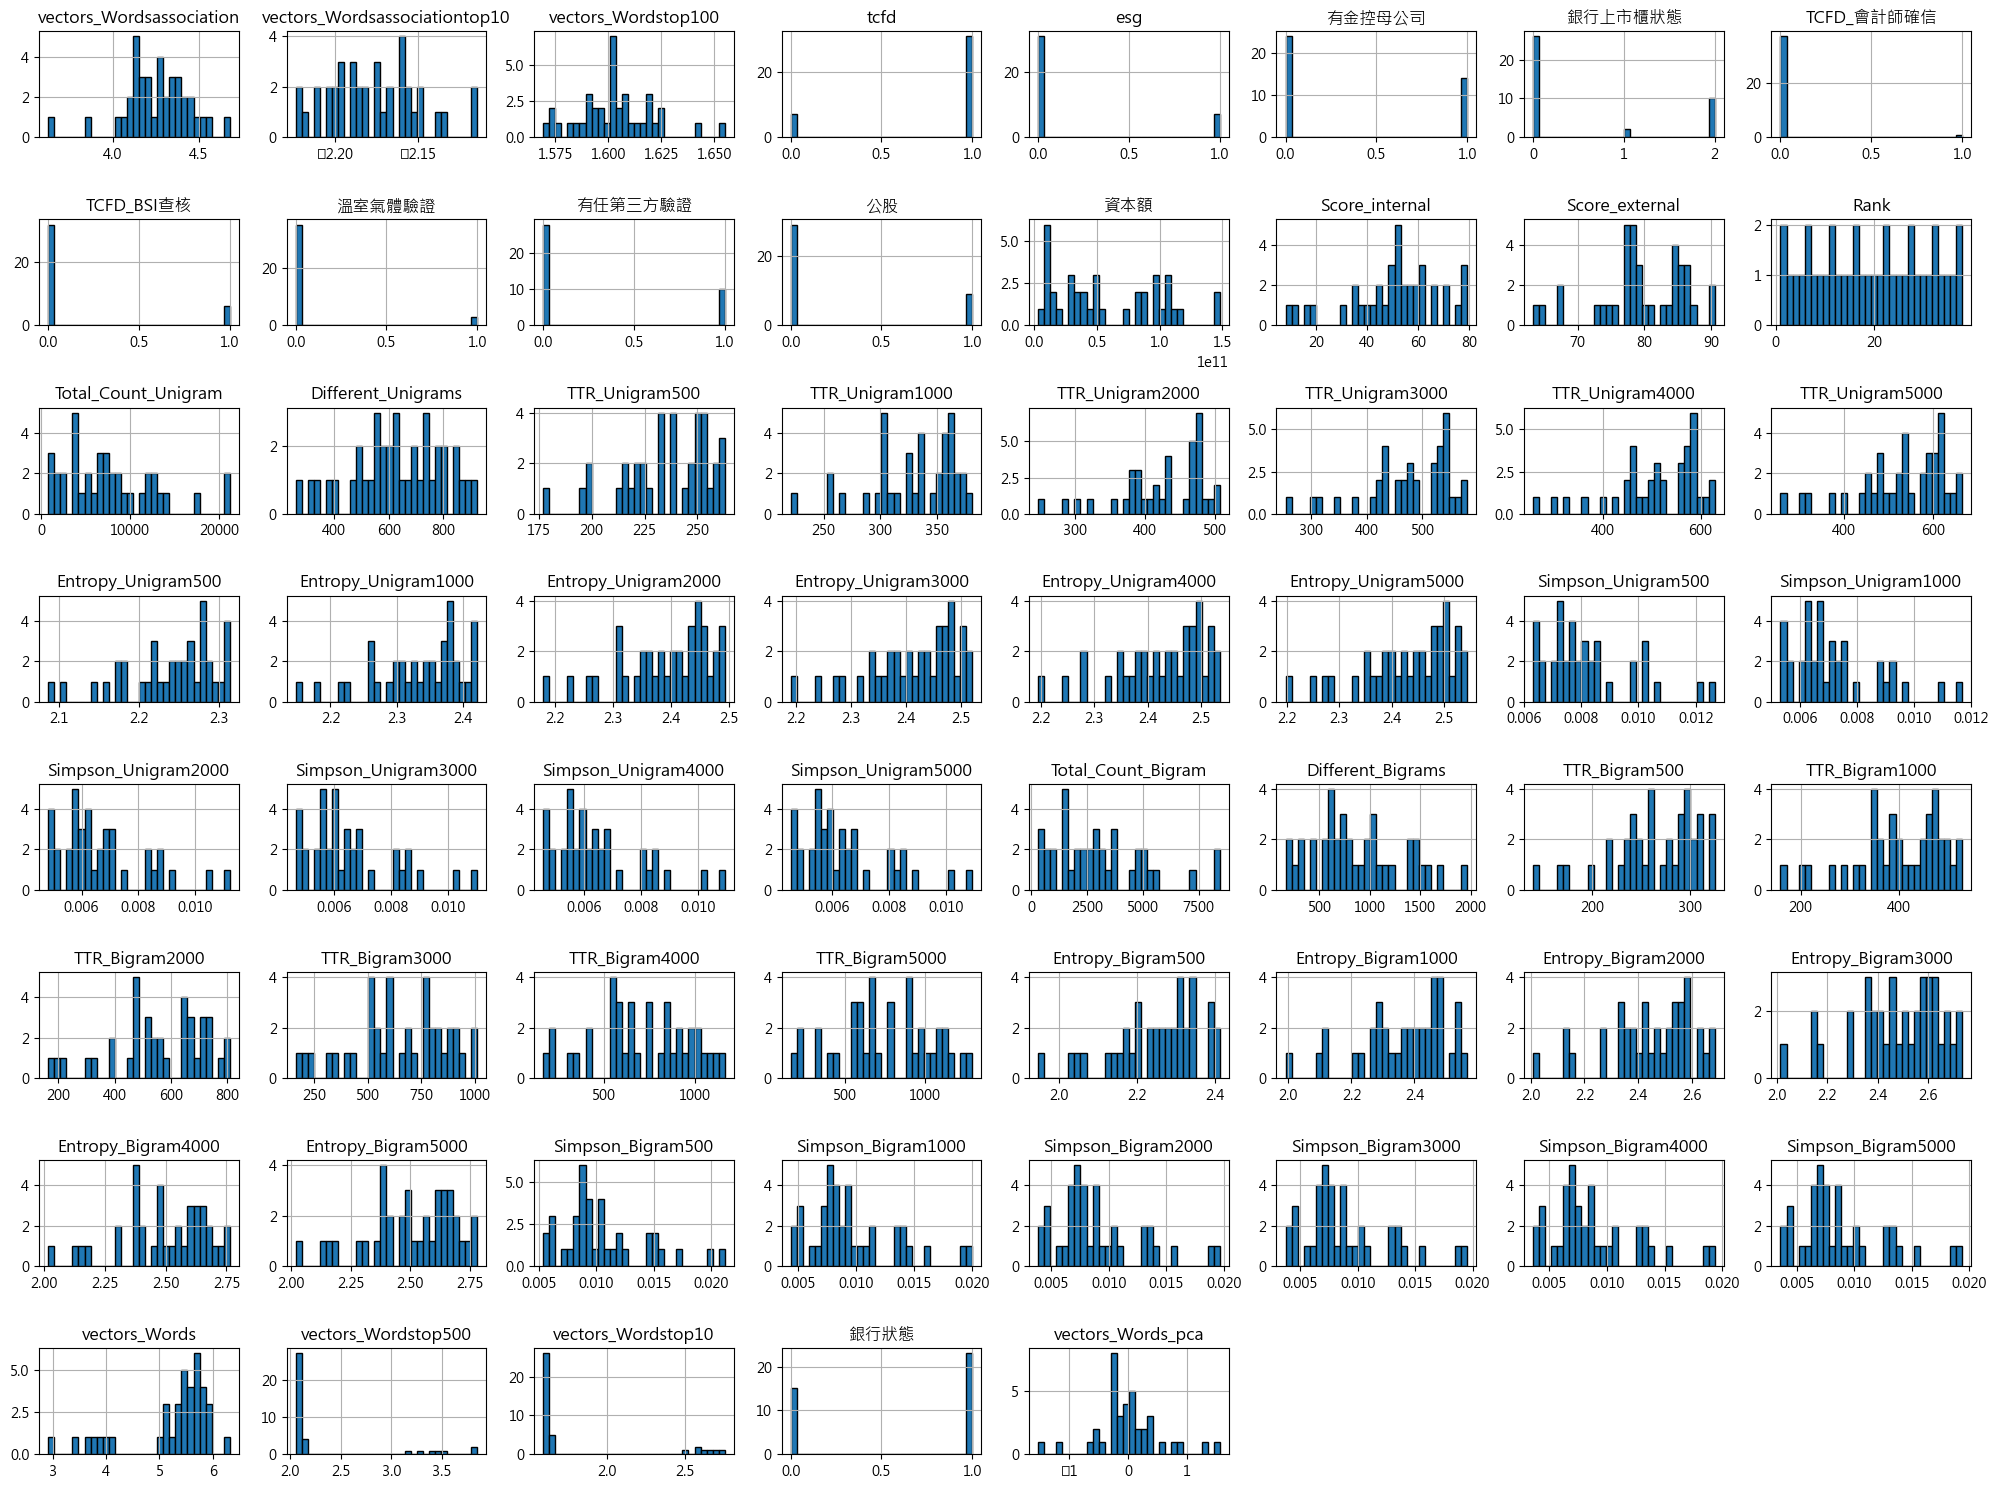

In [5]:
# 數值型變數的基本描述
numeric_cols = train.select_dtypes(include=['float64', 'int64'])

numeric_cols.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

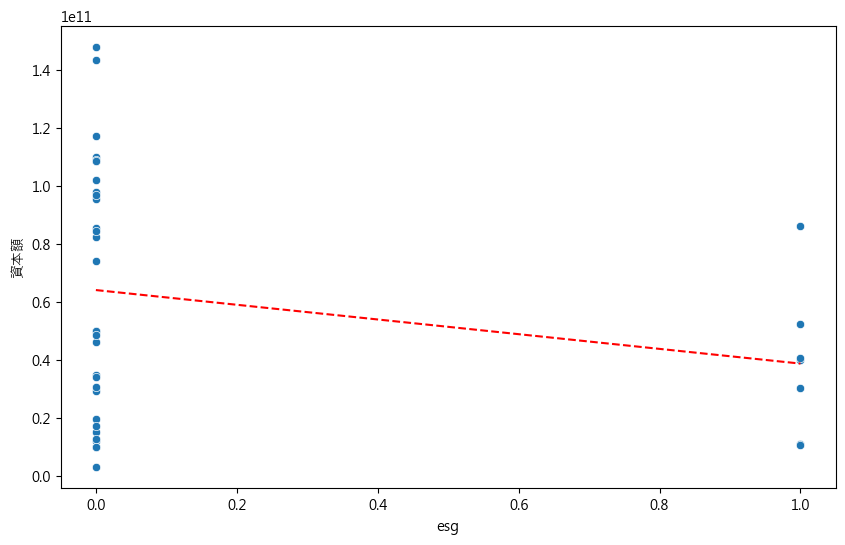

In [9]:
# 设置图表布局
plt.figure(figsize=(10, 6))
sns.scatterplot(x='esg', y='資本額', data=train)

x = train['esg']
y = train['資本額']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, intercept + slope * x, color='red', linestyle='--')

plt.show()

# y

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經將資料加載到 bank_data 和 insurance_data DataFrame 中
# 並且每個 DataFrame 包含 "internal_score" 和 "external_score" 這兩個列
ins = pd.read_excel('./data/insuranceContent/ins_tcfdesg_feature.xlsx')
bank = pd.read_excel('./data/bankContent/bank_tcfdesg_feature.xlsx')
ins_l= ins[ins['Life_Ins'] == 1]
ins_p = ins[ins['Property_Ins'] == 1]


In [5]:
bank[["Score_internal","Score_external"]].describe()

,Score_internal,Score_external
count,38.000000,38.000000
mean,50.885837,79.599342
std,17.808841,6.600231
min,8.002591,63.333333
25%,43.438861,77.229167
50%,51.874540,79.208333
75%,61.203564,84.645833
max,79.327352,90.541667


In [6]:
ins_l[["Score_internal","Score_external"]].describe()

,Score_internal,Score_external
count,21.000000,21.000000
mean,41.188502,77.286905
std,9.987934,5.029086
min,18.873457,66.916667
25%,37.174059,74.916667
50%,40.613250,76.650000
75%,45.592150,80.916667
max,61.875878,87.500000


In [7]:
ins_p[["Score_internal","Score_external"]].describe()

,Score_internal,Score_external
count,23.000000,23.000000
mean,29.670215,78.229814
std,14.507761,6.769831
min,0.166667,64.071429
25%,22.145532,73.767857
50%,26.977095,79.071429
75%,39.616064,82.500000
max,57.461256,89.291667


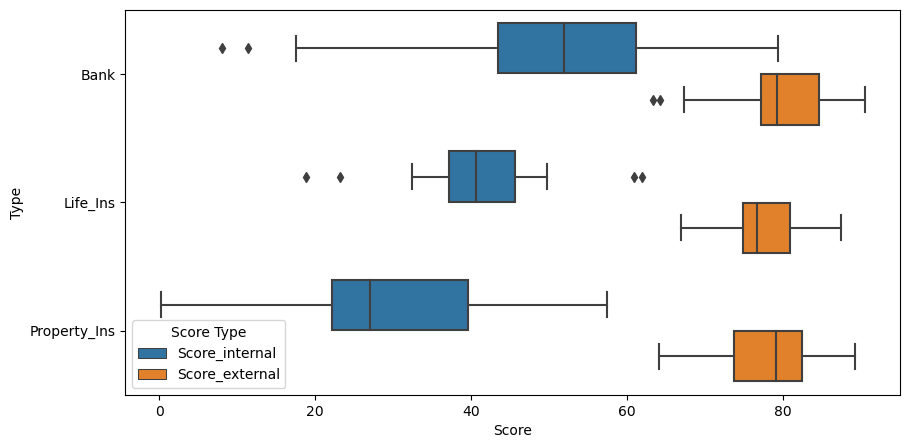

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經將資料加載到 bank_data 和 insurance_data DataFrame 中
# 並且每個 DataFrame 包含 "internal_score" 和 "external_score" 這兩個列
insurance_data = pd.read_excel('./data/insuranceContent/ins_tcfdesg_feature.xlsx')
bank_data = pd.read_excel('./data/bankContent/bank_tcfdesg_feature.xlsx')

# 重新組織數據，將 bank 和 insurance 的資料合併在一起
bank_data['type'] = 'Bank'

insurance_data_life = insurance_data[insurance_data['Life_Ins'] == 1].copy()
insurance_data_life['type'] = 'Life_Ins'
insurance_data_property = insurance_data[insurance_data['Property_Ins'] == 1].copy()
insurance_data_property['type'] = 'Property_Ins'

#insurance_data = pd.concat([insurance_data_life, insurance_data_property])
#insurance_data
# 為了方便繪圖，將數據重組為長格式
bank_long = pd.melt(bank_data, id_vars=['type'], value_vars=['Score_internal', 'Score_external'], 
                    var_name='score_type', value_name='score')
#print(bank_long.head(2))
insurance_life_long = pd.melt(insurance_data_life, id_vars=['type'], value_vars=['Score_internal', 'Score_external'], 
                         var_name='score_type', value_name='score')

insurance_property_long = pd.melt(insurance_data_property, id_vars=['type'], value_vars=['Score_internal', 'Score_external'], 
                         var_name='score_type', value_name='score')


# 合併數據
combined_data = pd.concat([bank_long, insurance_life_long, insurance_property_long])
combined_data
# 繪製箱型圖
plt.figure(figsize=(10, 5))
sns.boxplot(x='score', y='type', hue='score_type', data=combined_data)

#plt.title('Bank and Insurance Scores')
plt.xlabel('Score')
plt.ylabel('Type')
plt.legend(title='Score Type', loc='lower left')
plt.show()


In [ ]:
# 假设已经加载了您的数据，以下为提取各个数据的列
life = insurance_data_life[['Score_internal', 'Score_external']]
property_internal = insurance_data_property[['Score_internal']]
property_external = insurance_data_property[['Score_external']]
bank_internal = bank_data[['Score_internal']]
bank_external = bank_data[['Score_external']]

# 将所有数据合并为一个DataFrame
combined_data = pd.concat([life.rename(columns={'Score_internal': 'Life_Internal',
                                                'Score_external': 'Life_External'}),
                           property_internal.rename(columns={'Score_internal': 'Property_Internal'}),
                           property_external.rename(columns={'Score_external': 'Property_External'}),
                           bank_internal.rename(columns={'Score_internal': 'Bank_Internal'}),
                           bank_external.rename(columns={'Score_external': 'Bank_External'})], axis=1)
combined_data_fillna = combined_data.fillna(combined_data.median())
#combined_data_fillna
# 计算相关系数矩阵
corr_matrix_p = combined_data_fillna.corr(method='pearson')
corr_matrix_s = combined_data_fillna.corr(method='spearman')#.round(2)

print(corr_matrix_p)

                   Life_Internal  Life_External  Property_Internal  \
Life_Internal           1.000000       0.498129          -0.005543   
Life_External           0.498129       1.000000          -0.012145   
Property_Internal      -0.005543      -0.012145           1.000000   
Property_External       0.003729       0.008172           0.840413   
Bank_Internal          -0.151301      -0.118510           0.009706   
Bank_External          -0.134151      -0.053292           0.108542   

                   Property_External  Bank_Internal  Bank_External  
Life_Internal               0.003729      -0.151301      -0.134151  
Life_External               0.008172      -0.118510      -0.053292  
Property_Internal           0.840413       0.009706       0.108542  
Property_External           1.000000      -0.051091       0.111931  
Bank_Internal              -0.051091       1.000000       0.898665  
Bank_External               0.111931       0.898665       1.000000  


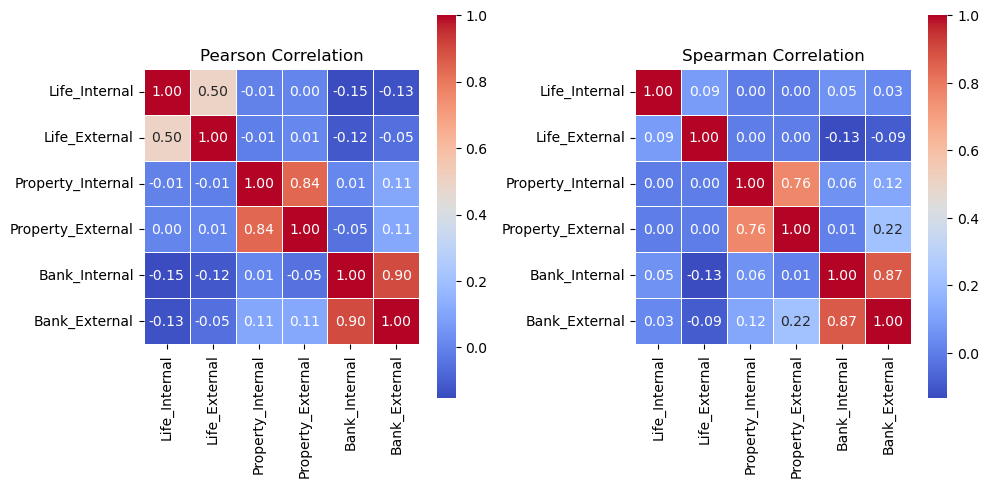

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_p, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=axs[0]) #, square=True
axs[0].set_title('Pearson Correlation')

sns.heatmap(corr_matrix_s, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=axs[1])
axs[1].set_title('Spearman Correlation')
# Adjust layout
plt.tight_layout()

# X vs Y_numeric
## Bank

### Internal

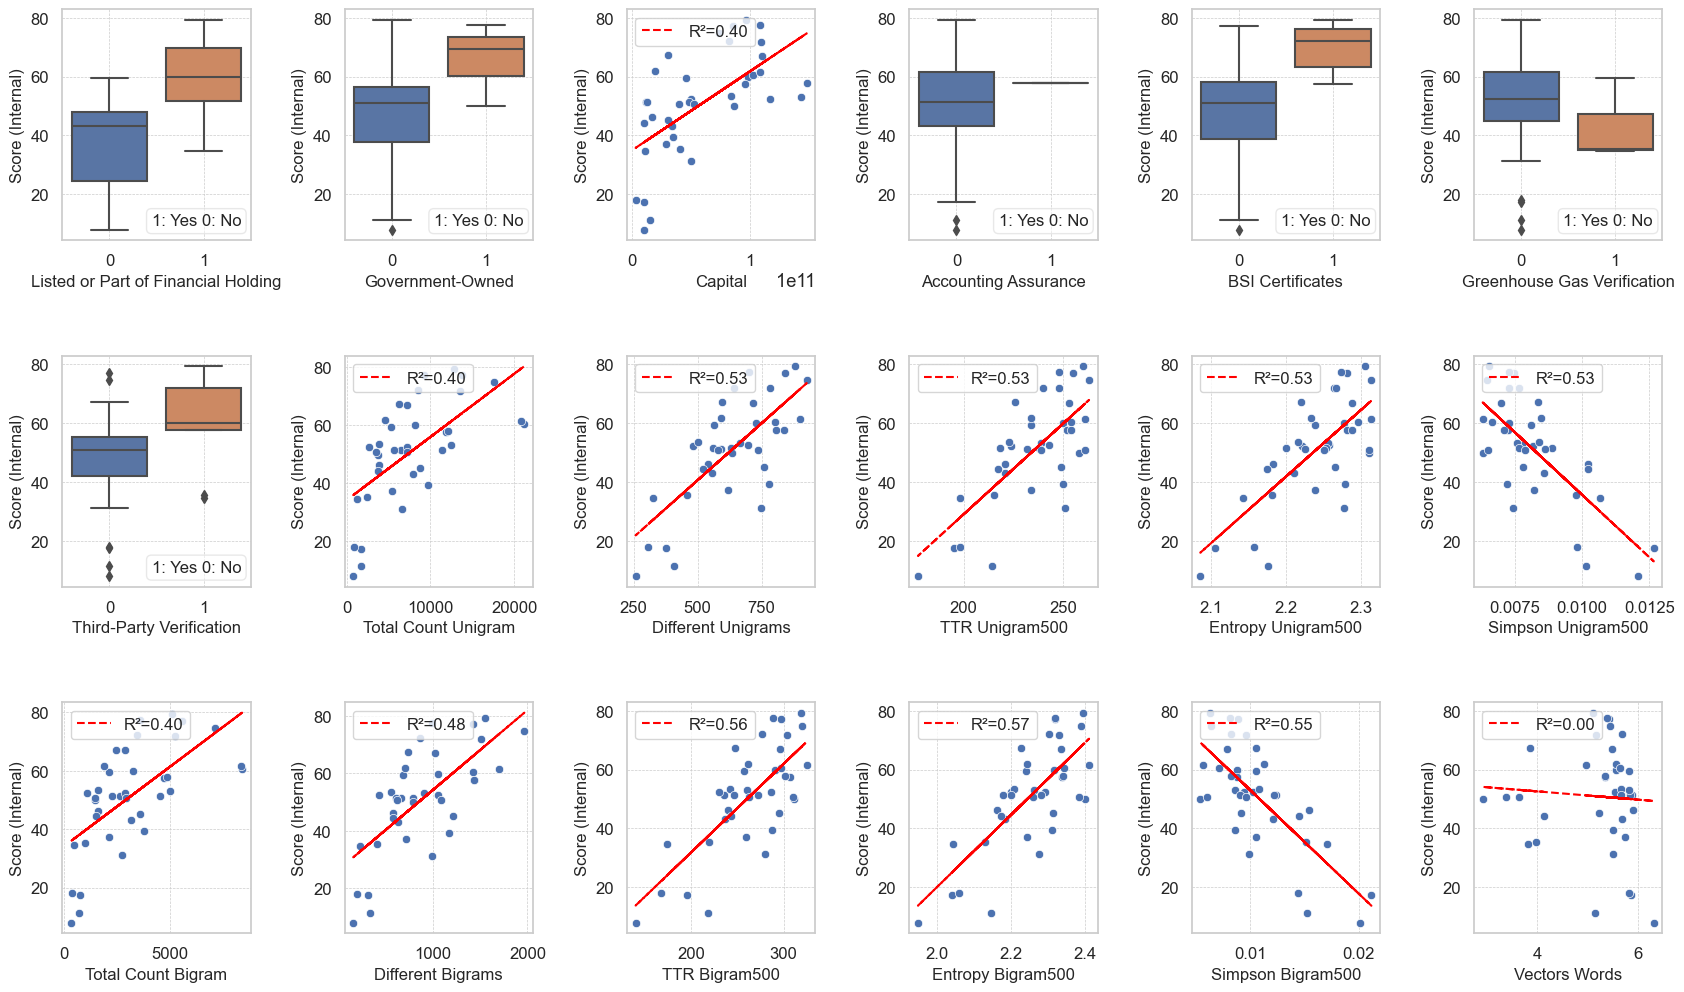

In [45]:
# 加载数据
df_bank_engvariable = pd.read_excel('./data/bankContent/bank_tcfdesg_feature_engvariable.xlsx')

# 设置图表布局
fig, axs = plt.subplots(3, 6, figsize=(20, 12))#14, 10

# 设置通用样式
sns.set(style="whitegrid", font_scale=1.2) #整體字體的放大倍率

# x-label 替換映射
label_mapping = {
    'bank_status': 'Listed or Part of Financial Holding',
    'TTR_Unigram500': 'TTR Unigram500',
    'TTR_Bigram500': 'TTR Bigram500',
    'BSI-issued_certificates': 'BSI Certificates',
}

# Boxplot特徵
boxplot_axs = [
    ('bank_status', axs[0, 0], '1: Yes 0: No'),
    ('government-owned', axs[0,1], '1: Yes 0: No'),
    ('accounting_assurance', axs[0, 3], '1: Yes 0: No'),
    ('BSI-issued_certificates', axs[0, 4], '1: Yes 0: No'),
    ('greenhouse_gas_verification', axs[0, 5], '1: Yes 0: No'),
    ('third-party_verification', axs[1,0], '1: Yes 0: No')
]


# 绘制箱线图
for x_col, ax, legend_text in boxplot_axs:
    sns.boxplot(x=x_col, y='Score_internal', data=df_bank_engvariable, ax=ax)
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # 替換特定標籤
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (Internal)', fontsize=12)
    ## 添加 legend 到 boxplot
    #ax.legend([legend_text], loc='lower right', fontsize=12,handletextpad=0.8, borderaxespad=0.5)#, frameon=True, edgecolor='black', handlelength=0)
    # 添加文字標註代替 legend
    ax.text(0.95, 0.05, 
            legend_text,
            transform=ax.transAxes,  # 使用子圖座標系
            fontsize=12, 
            va='bottom', 
            ha='right',
            bbox=dict(
                facecolor= 'white',  # Background color
                alpha=0.5,                # Fully opaque
                edgecolor='lightgray',  # Light gray border
                boxstyle='round'),       # Optional: rounded corners2            
            )

# 绘制带有趋势线的散点图
scatter_axs = [
    ('capital', 'Score_internal', axs[0, 2]),
    ('Total_Count_Unigram', 'Score_internal', axs[1, 1]),
    ('Different_Unigrams', 'Score_internal', axs[1, 2]),
    ('TTR_Unigram500', 'Score_internal', axs[1, 3]),
    ('Entropy_Unigram500', 'Score_internal', axs[1, 4]),
    ('Simpson_Unigram500', 'Score_internal', axs[1, 5]),
    ('Total_Count_Bigram', 'Score_internal', axs[2, 0]),
    ('Different_Bigrams', 'Score_internal', axs[2, 1]),
    ('TTR_Bigram500', 'Score_internal', axs[2, 2]),
    ('Entropy_Bigram500', 'Score_internal', axs[2, 3]),
    ('Simpson_Bigram500', 'Score_internal', axs[2, 4]),
    ('vectors_Words', 'Score_internal', axs[2, 5]),
]

# 定义添加趋势线的函数
def add_trendline(ax, x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.plot(x, intercept + slope * x, color='red', linestyle='--', label=f'R²={r_value**2:.2f}')
    ax.legend(loc='upper left', fontsize=12)  # 顯示 R² 值

for x_col, y_col, ax in scatter_axs:
    sns.scatterplot(x=x_col, y=y_col, data=df_bank_engvariable, ax=ax)
    add_trendline(ax, df_bank_engvariable[x_col], df_bank_engvariable[y_col])
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # 替換特定標籤    
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (Internal)', fontsize=12)

# 为所有子图添加网格
for ax in axs.flat:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9) #left=0.1, right=0.9:左右各留 10% 空白。#top=0.85, bottom=0.15:上下各留 15% 空白 #wspace=0.5 和 hspace=0.5：子圖之間的間距為子圖寬/高的 50%。

# 保存图形为高分辨率输出
plt.savefig('tier1_compliant_figure.png', dpi=1000, bbox_inches='tight') #png insert to word is better than insert pdf when converting paper to pdf # feel like paste or insert dpi1000-figure has no differnece
#plt.savefig('tier1_compliant_figure.pdf', dpi=1000, bbox_inches='tight')
# 显示图形
plt.show()

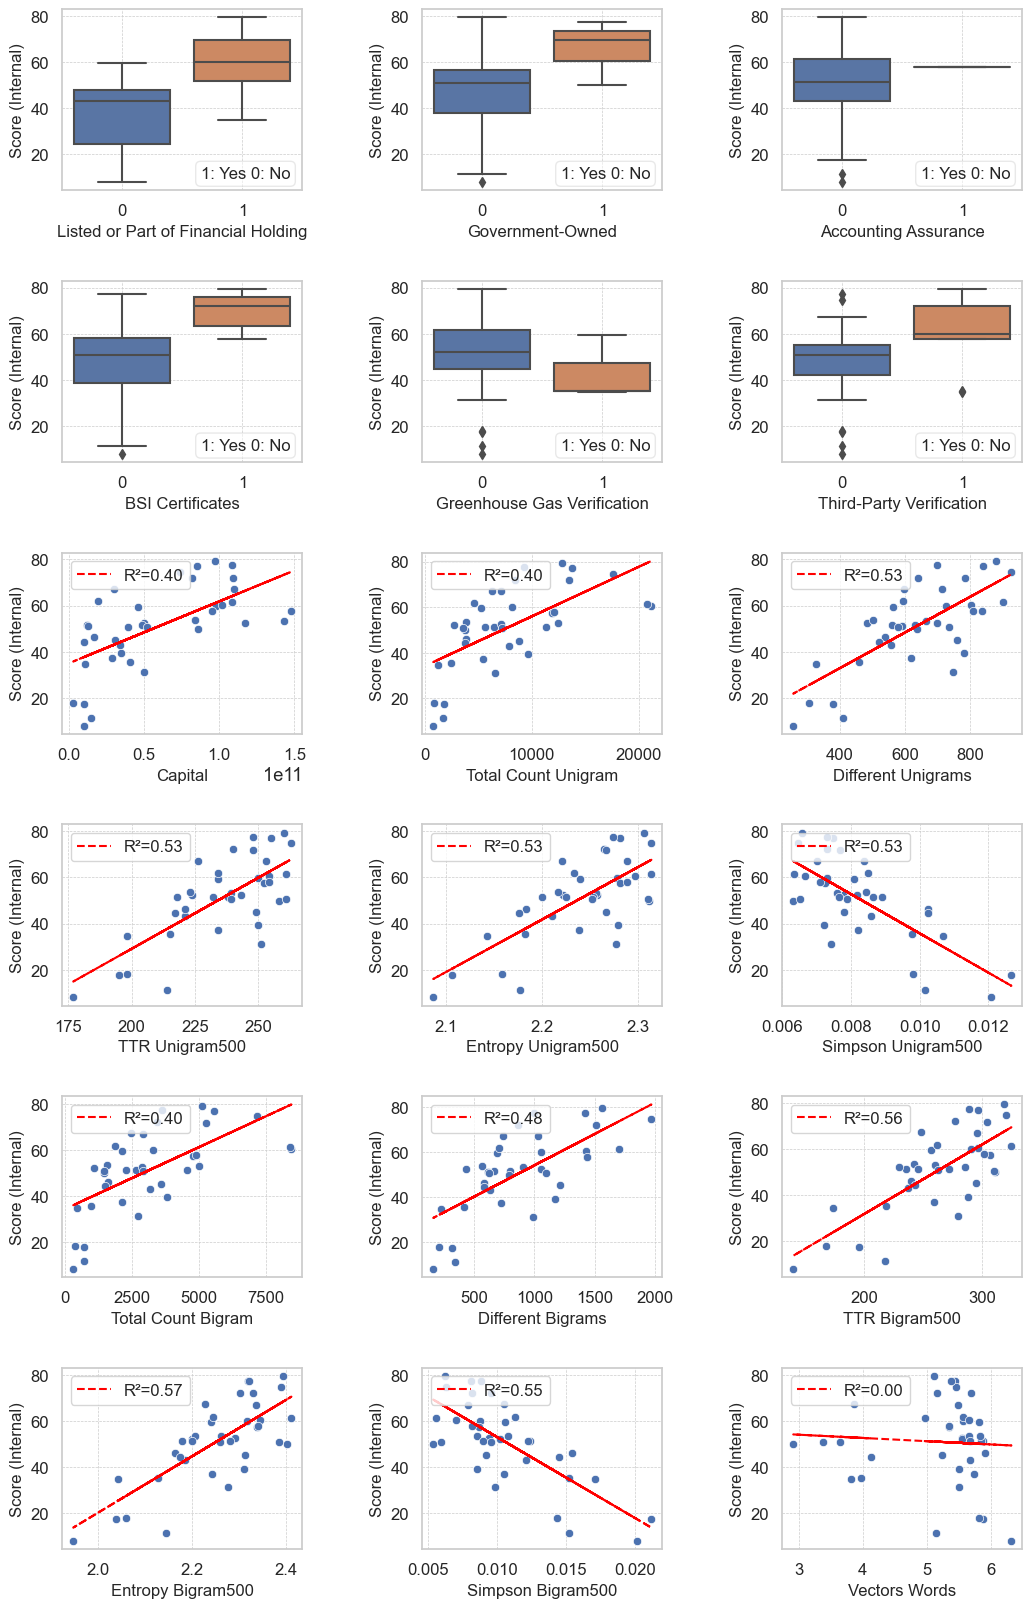

In [46]:
# Load Data
df_bank_engvariable = pd.read_excel('./data/bankContent/bank_tcfdesg_feature_engvariable.xlsx')

# Set up 6x3 figure layout
fig, axs = plt.subplots(6, 3, figsize=(12, 20))

# Set general style
sns.set(style="whitegrid", font_scale=1.2)  # Scale font size

# X-label mapping for replacements
label_mapping = {
    'bank_status': 'Listed or Part of Financial Holding',
    'TTR_Unigram500': 'TTR Unigram500',
    'TTR_Bigram500': 'TTR Bigram500',
    'BSI-issued_certificates': 'BSI Certificates',
}

# Boxplot data and axes
boxplot_axs = [
    ('bank_status', axs[0, 0], '1: Yes 0: No'),
    ('government-owned', axs[0, 1], '1: Yes 0: No'),
    ('accounting_assurance', axs[0, 2], '1: Yes 0: No'),
    ('BSI-issued_certificates', axs[1, 0], '1: Yes 0: No'),
    ('greenhouse_gas_verification', axs[1, 1], '1: Yes 0: No'),
    ('third-party_verification', axs[1, 2], '1: Yes 0: No')
]

# Plot boxplots
for x_col, ax, legend_text in boxplot_axs:
    sns.boxplot(x=x_col, y='Score_internal', data=df_bank_engvariable, ax=ax)
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (Internal)', fontsize=12)
    # Add text annotation instead of legend
    ax.text(0.95, 0.05, 
            legend_text,
            transform=ax.transAxes,  # Use subplot coordinate system
            fontsize=12, 
            va='bottom', 
            ha='right',
            bbox=dict(
                facecolor='white',  # Background color
                alpha=0.5,  # Semi-transparent
                edgecolor='lightgray',  # Light gray border
                boxstyle='round')
            )

# Scatterplot data and axes
scatter_axs = [
    ('capital', axs[2, 0]),
    ('Total_Count_Unigram', axs[2, 1]),
    ('Different_Unigrams', axs[2, 2]),
    ('TTR_Unigram500', axs[3, 0]),
    ('Entropy_Unigram500', axs[3, 1]),
    ('Simpson_Unigram500', axs[3, 2]),
    ('Total_Count_Bigram', axs[4, 0]),
    ('Different_Bigrams', axs[4, 1]),
    ('TTR_Bigram500', axs[4, 2]),
    ('Entropy_Bigram500', axs[5, 0]),
    ('Simpson_Bigram500', axs[5, 1]),
    ('vectors_Words', axs[5, 2]),
]

# Define function to add trendlines
def add_trendline(ax, x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.plot(x, intercept + slope * x, color='red', linestyle='--', label=f'R²={r_value**2:.2f}')
    ax.legend(loc='upper left', fontsize=12)  # Display R² value

# Plot scatterplots with trendlines
for x_col, ax in scatter_axs:
    sns.scatterplot(x=x_col, y='Score_internal', data=df_bank_engvariable, ax=ax)
    add_trendline(ax, df_bank_engvariable[x_col], df_bank_engvariable['Score_internal'])
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (Internal)', fontsize=12)

# Add grid and adjust tick params for all subplots
for ax in axs.flat:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9)  # Adjust subplot layout

# Save figure
plt.savefig('tier1_compliant_figure_6x3_bank_internal.png', dpi=1000, bbox_inches='tight')

# Display figure
plt.show()


### External

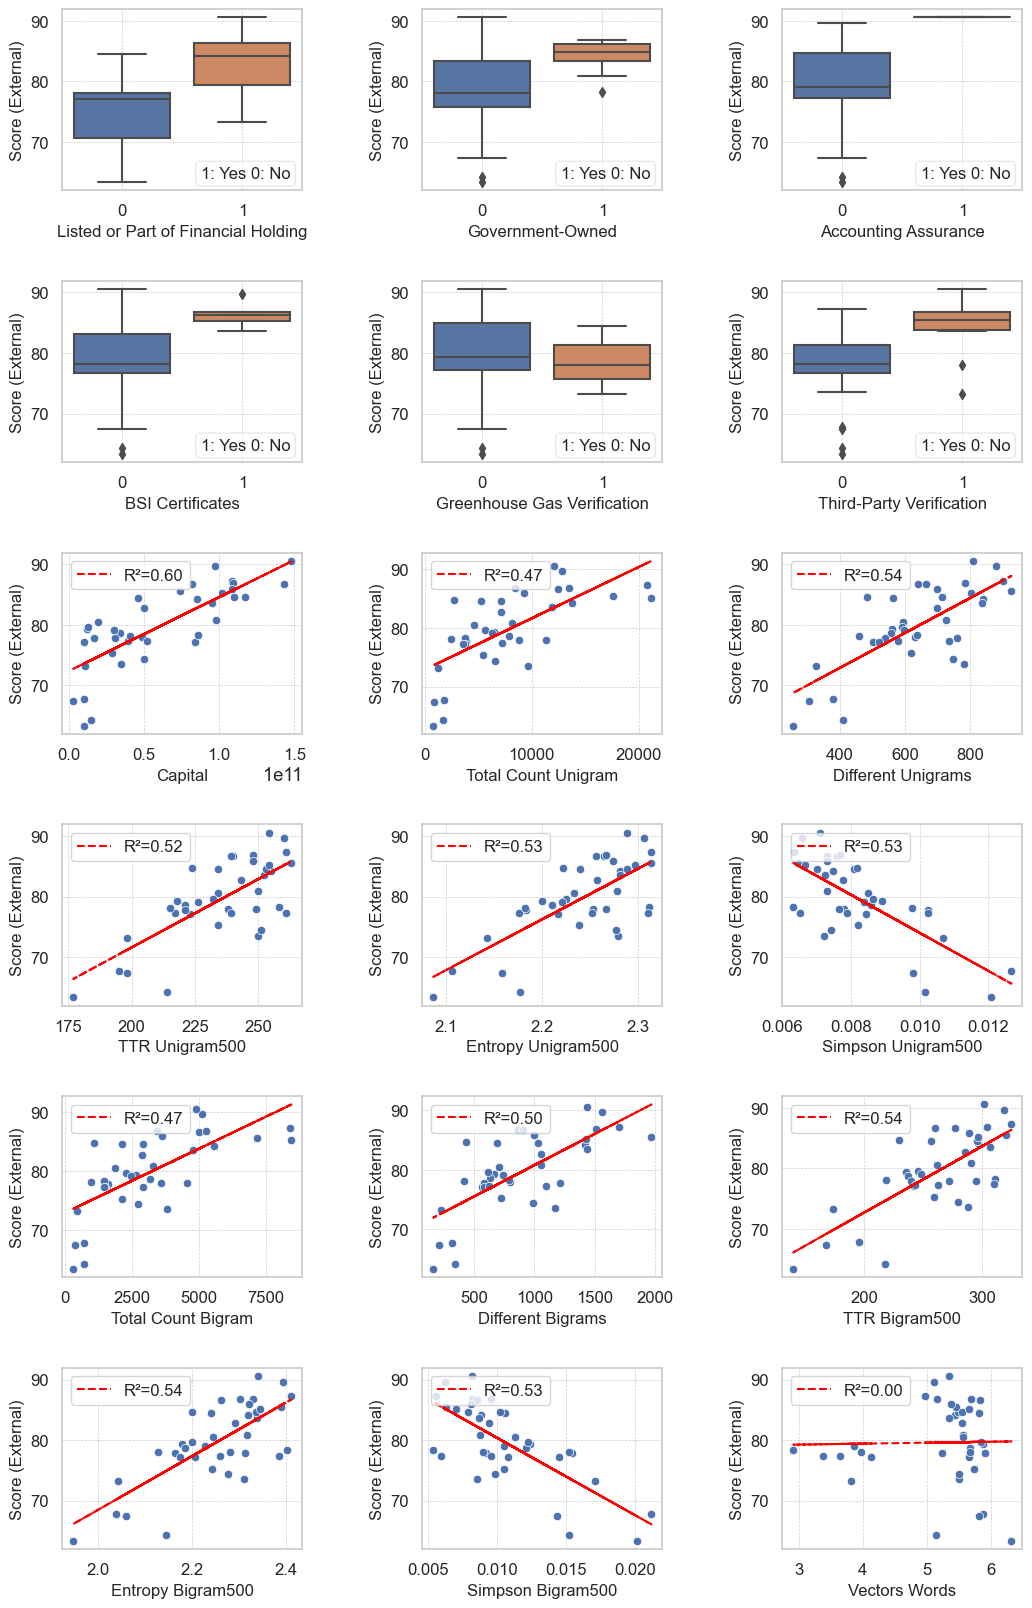

In [47]:
# Load Data
df_bank_engvariable = pd.read_excel('./data/bankContent/bank_tcfdesg_feature_engvariable.xlsx')

# Set up 6x3 figure layout
fig, axs = plt.subplots(6, 3, figsize=(12, 20))

# Set general style
sns.set(style="whitegrid", font_scale=1.2)  # Scale font size

# X-label mapping for replacements
label_mapping = {
    'bank_status': 'Listed or Part of Financial Holding',
    'TTR_Unigram500': 'TTR Unigram500',
    'TTR_Bigram500': 'TTR Bigram500',
    'BSI-issued_certificates': 'BSI Certificates',
}

# Boxplot data and axes
boxplot_axs = [
    ('bank_status', axs[0, 0], '1: Yes 0: No'),
    ('government-owned', axs[0, 1], '1: Yes 0: No'),
    ('accounting_assurance', axs[0, 2], '1: Yes 0: No'),
    ('BSI-issued_certificates', axs[1, 0], '1: Yes 0: No'),
    ('greenhouse_gas_verification', axs[1, 1], '1: Yes 0: No'),
    ('third-party_verification', axs[1, 2], '1: Yes 0: No')
]

# Plot boxplots
for x_col, ax, legend_text in boxplot_axs:
    sns.boxplot(x=x_col, y='Score_external', data=df_bank_engvariable, ax=ax)
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (External)', fontsize=12)
    # Add text annotation instead of legend
    ax.text(0.95, 0.05, 
            legend_text,
            transform=ax.transAxes,  # Use subplot coordinate system
            fontsize=12, 
            va='bottom', 
            ha='right',
            bbox=dict(
                facecolor='white',  # Background color
                alpha=0.5,  # Semi-transparent
                edgecolor='lightgray',  # Light gray border
                boxstyle='round')
            )

# Scatterplot data and axes
scatter_axs = [
    ('capital', axs[2, 0]),
    ('Total_Count_Unigram', axs[2, 1]),
    ('Different_Unigrams', axs[2, 2]),
    ('TTR_Unigram500', axs[3, 0]),
    ('Entropy_Unigram500', axs[3, 1]),
    ('Simpson_Unigram500', axs[3, 2]),
    ('Total_Count_Bigram', axs[4, 0]),
    ('Different_Bigrams', axs[4, 1]),
    ('TTR_Bigram500', axs[4, 2]),
    ('Entropy_Bigram500', axs[5, 0]),
    ('Simpson_Bigram500', axs[5, 1]),
    ('vectors_Words', axs[5, 2]),
]

# Define function to add trendlines
def add_trendline(ax, x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.plot(x, intercept + slope * x, color='red', linestyle='--', label=f'R²={r_value**2:.2f}')
    ax.legend(loc='upper left', fontsize=12)  # Display R² value

# Plot scatterplots with trendlines
for x_col, ax in scatter_axs:
    sns.scatterplot(x=x_col, y='Score_external', data=df_bank_engvariable, ax=ax)
    add_trendline(ax, df_bank_engvariable[x_col], df_bank_engvariable['Score_external'])
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (External)', fontsize=12)

# Add grid and adjust tick params for all subplots
for ax in axs.flat:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9)  # Adjust subplot layout

# Save figure
plt.savefig('tier1_compliant_figure_6x3_bank_external.png', dpi=1000, bbox_inches='tight')

# Display figure
plt.show()


## 單張圖片

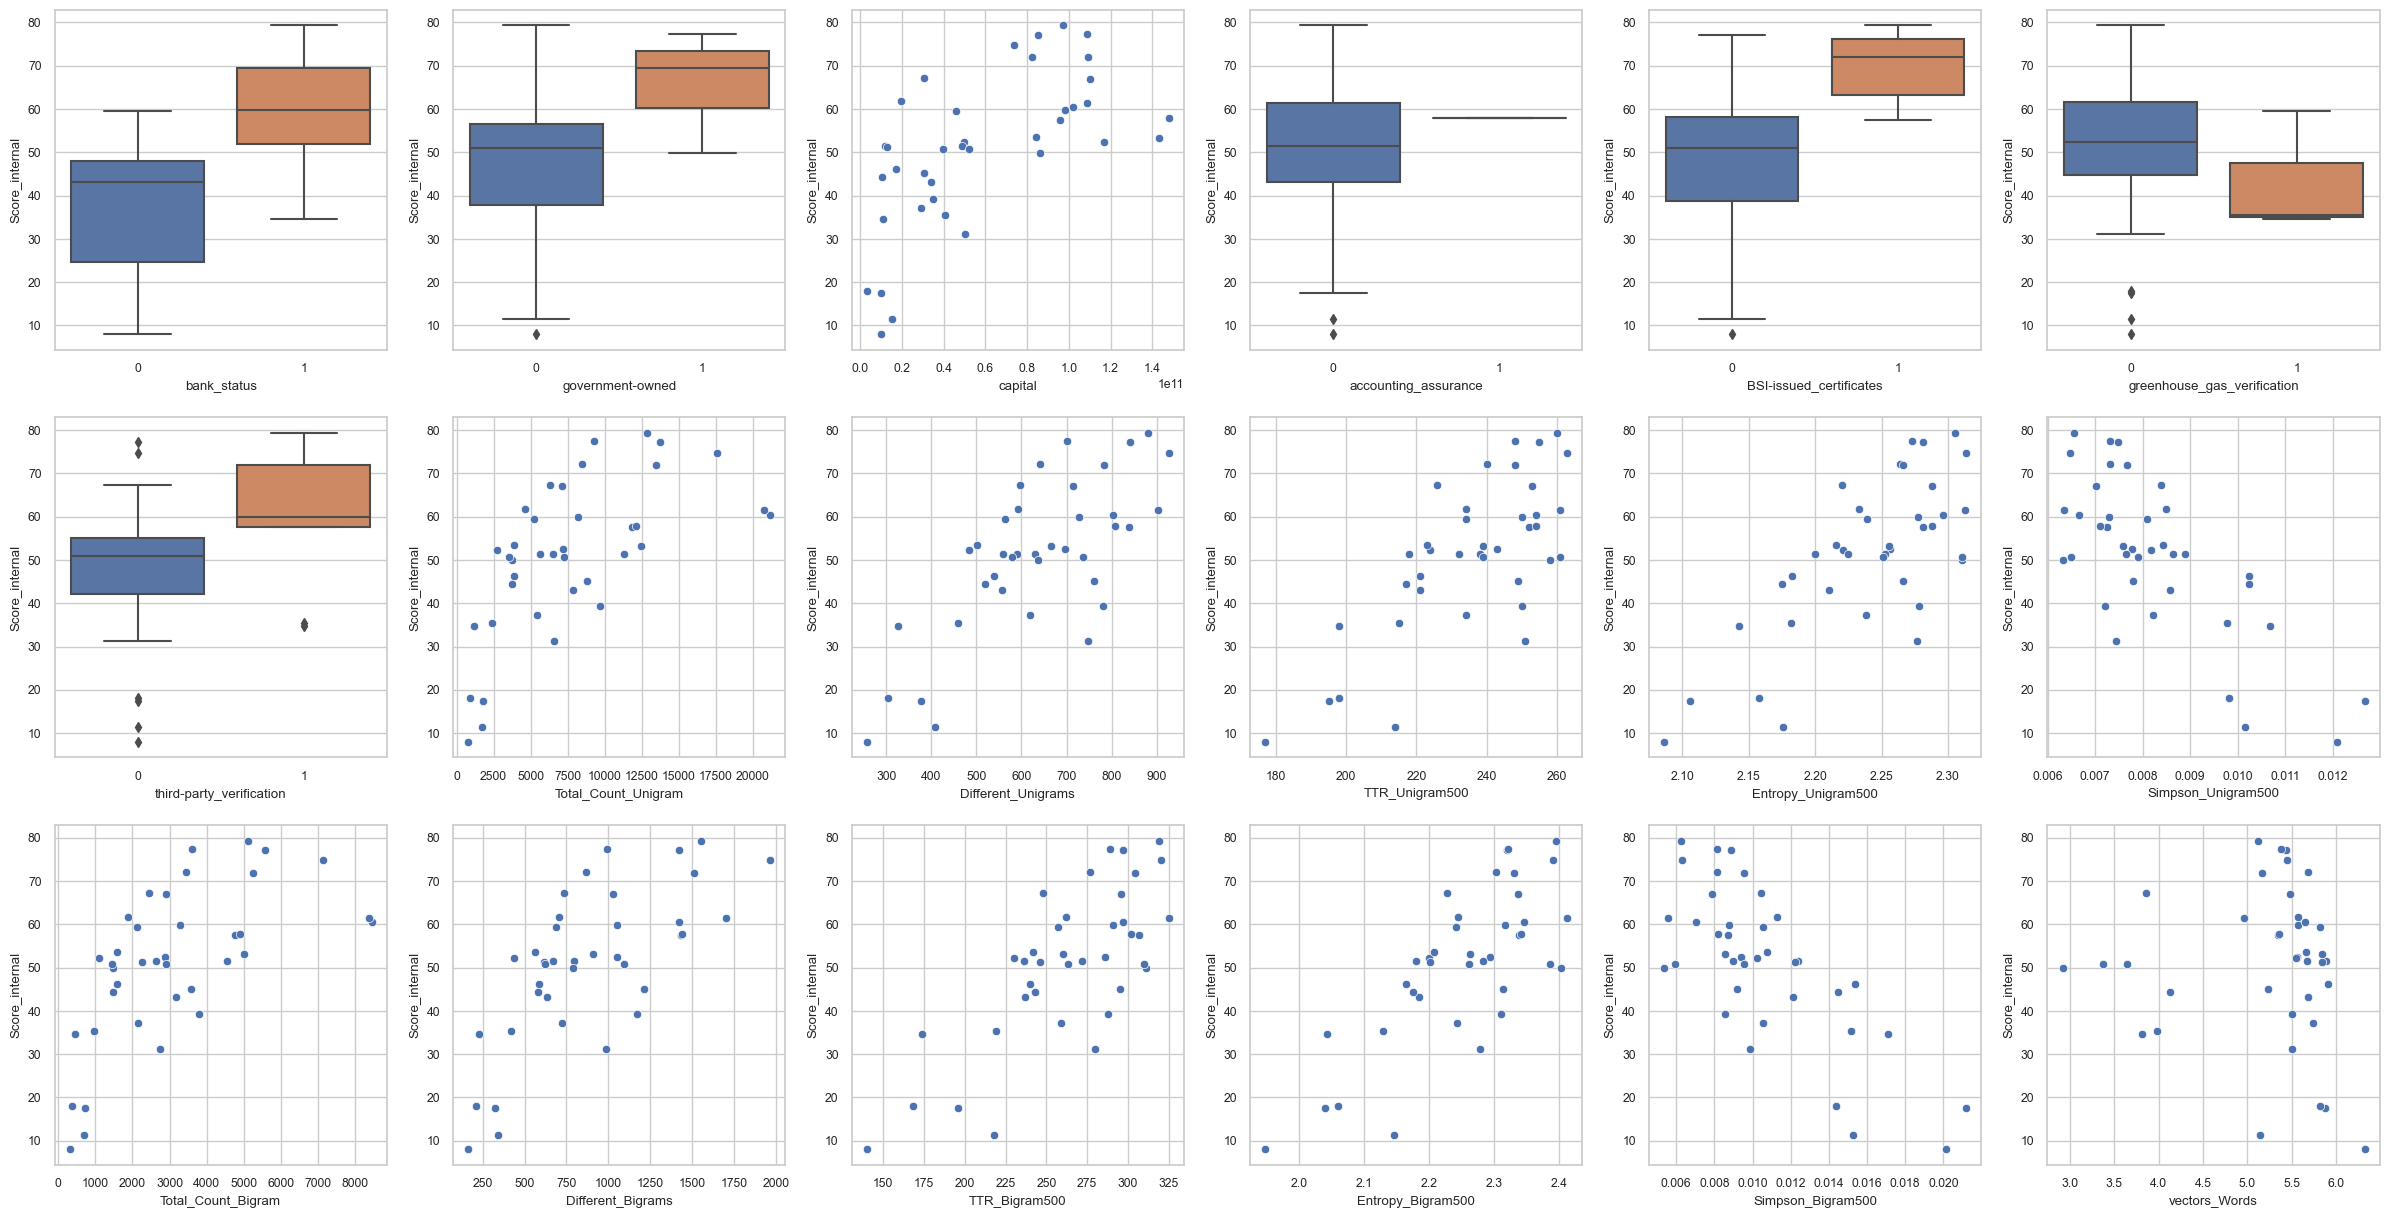

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_bank_engvariable = pd.read_excel('./data/bankContent/bank_tcfdesg_feature_engvariable.xlsx')
## 設定字體以顯示中文
#sns.set(style="whitegrid", font_scale=0.8)
#plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

fig, axs = plt.subplots(3, 6, figsize=(30, 15))

sns.boxplot(x='bank_status', y='Score_internal', data=df_bank_engvariable, ax=axs[0,0])
sns.boxplot(x='government-owned', y='Score_internal', data=df_bank_engvariable, ax=axs[0,1])

sns.scatterplot(x='capital', y='Score_internal', data=df_bank_engvariable, ax=axs[0,2])
sns.boxplot(x='accounting_assurance', y='Score_internal', data=df_bank_engvariable, ax=axs[0,3])
sns.boxplot(x='BSI-issued_certificates', y='Score_internal', data=df_bank_engvariable, ax=axs[0,4])
sns.boxplot(x='greenhouse_gas_verification', y='Score_internal', data=df_bank_engvariable, ax=axs[0,5])
sns.boxplot(x='third-party_verification', y='Score_internal', data=df_bank_engvariable, ax=axs[1,0])
sns.scatterplot(x='Total_Count_Unigram', y='Score_internal', data=df_bank_engvariable, ax=axs[1,1])
sns.scatterplot(x='Different_Unigrams', y='Score_internal', data=df_bank_engvariable, ax=axs[1,2])
sns.scatterplot(x='TTR_Unigram500', y='Score_internal', data=df_bank_engvariable, ax=axs[1,3])
sns.scatterplot(x='Entropy_Unigram500', y='Score_internal', data=df_bank_engvariable, ax=axs[1,4])
sns.scatterplot(x='Simpson_Unigram500', y='Score_internal', data=df_bank_engvariable, ax=axs[1,5])

sns.scatterplot(x='Total_Count_Bigram', y='Score_internal', data=df_bank_engvariable, ax=axs[2,0])
sns.scatterplot(x='Different_Bigrams', y='Score_internal', data=df_bank_engvariable, ax=axs[2,1])
sns.scatterplot(x='TTR_Bigram500', y='Score_internal', data=df_bank_engvariable, ax=axs[2,2])
sns.scatterplot(x='Entropy_Bigram500', y='Score_internal', data=df_bank_engvariable, ax=axs[2,3])
sns.scatterplot(x='Simpson_Bigram500', y='Score_internal', data=df_bank_engvariable, ax=axs[2,4])
sns.scatterplot(x='vectors_Words', y='Score_internal', data=df_bank_engvariable, ax=axs[2,5])

#plt.subplots_adjust(wspace=0.5, hspace=0.4)  # wspace 增加列之间的间距，hspace 增加行之间的间距
# 为所有子图添加网格
#for ax in axs.flat:
#    ax.grid(True)
plt.show()

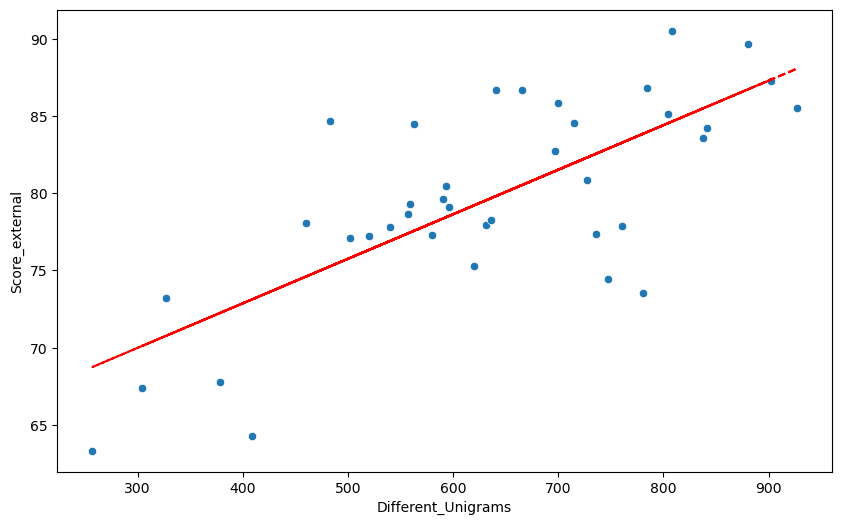

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 加载数据
df_bank_engvariable = pd.read_excel('./data/bankContent/bank_tcfdesg_feature_engvariable.xlsx')
# 設置 x 和 y 變數
x = df_bank_engvariable['Different_Unigrams']
y = df_bank_engvariable['Score_external']

# 设置图表布局
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Different_Unigrams', y='Score_external', data=df_bank_engvariable)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, intercept + slope * x, color='red', linestyle='--')

plt.show()

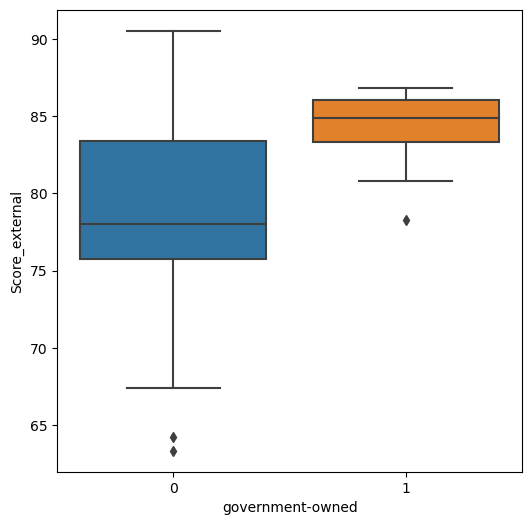

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 加载数据
df_bank_engvariable = pd.read_excel('./data/bankContent/bank_tcfdesg_feature_engvariable.xlsx')
plt.figure(figsize=(6, 6))
# 绘制箱线图和散点图
sns.boxplot(x='government-owned', y='Score_external', data=df_bank_engvariable)
plt.show()

## Insurance

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 加载数据
df_ins_engvariable = pd.read_excel('./data/insuranceContent/ins_tcfdesg_feature_engvariable.xlsx')
df_life = df_ins_engvariable[df_ins_engvariable['Life_Ins']==1]
df_property = df_ins_engvariable[df_ins_engvariable['Property_Ins']==1]

#plotdf = df_life
plotdf = df_property

### Internal

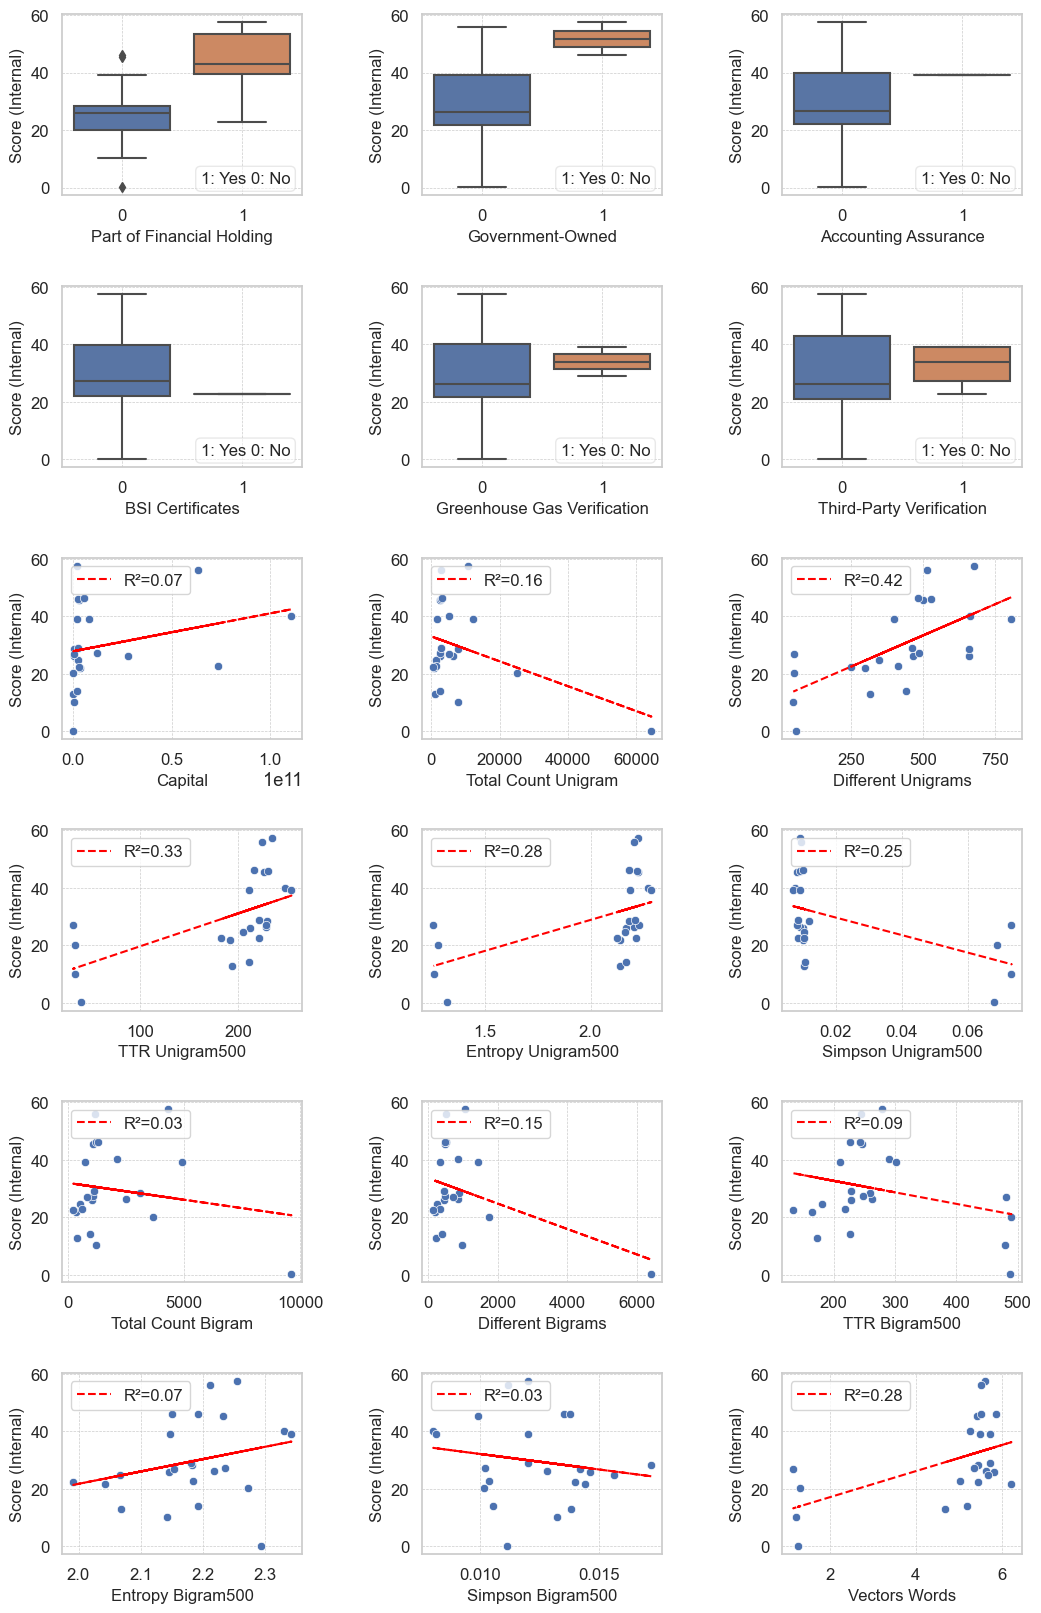

In [106]:
# Set up 6x3 figure layout
fig, axs = plt.subplots(6, 3, figsize=(12, 20))

# Set general style
sns.set(style="whitegrid", font_scale=1.2)  # Scale font size

# X-label mapping for replacements
label_mapping = {
    'financial_holding_parent_company': 'Part of Financial Holding',
    'government-owned_parent_company': 'Government-Owned',
    'TTR_Unigram500': 'TTR Unigram500',
    'TTR_Bigram500': 'TTR Bigram500',
    'BSI-issued_certificates': 'BSI Certificates',
}

# Boxplot data and axes
boxplot_axs = [
    ('financial_holding_parent_company', axs[0, 0], '1: Yes 0: No'),
    ('government-owned_parent_company', axs[0, 1], '1: Yes 0: No'),
    ('accounting_assurance', axs[0, 2], '1: Yes 0: No'),
    ('BSI-issued_certificates', axs[1, 0], '1: Yes 0: No'),
    ('greenhouse_gas_verification', axs[1, 1], '1: Yes 0: No'),
    ('third-party_verification', axs[1, 2], '1: Yes 0: No')
]

# Plot boxplots
for x_col, ax, legend_text in boxplot_axs:
    sns.boxplot(x=x_col, y='Score_internal', data=plotdf, ax=ax)
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (Internal)', fontsize=12)
    # Add text annotation instead of legend
    ax.text(0.95, 0.05, 
            legend_text,
            transform=ax.transAxes,  # Use subplot coordinate system
            fontsize=12, 
            va='bottom', 
            ha='right',
            bbox=dict(
                facecolor='white',  # Background color
                alpha=0.5,  # Semi-transparent
                edgecolor='lightgray',  # Light gray border
                boxstyle='round')
            )

# Scatterplot data and axes
scatter_axs = [
    ('capital', axs[2, 0]),
    ('Total_Count_Unigram', axs[2, 1]),
    ('Different_Unigrams', axs[2, 2]),
    ('TTR_Unigram500', axs[3, 0]),
    ('Entropy_Unigram500', axs[3, 1]),
    ('Simpson_Unigram500', axs[3, 2]),
    ('Total_Count_Bigram', axs[4, 0]),
    ('Different_Bigrams', axs[4, 1]),
    ('TTR_Bigram500', axs[4, 2]),
    ('Entropy_Bigram500', axs[5, 0]),
    ('Simpson_Bigram500', axs[5, 1]),
    ('vectors_Words', axs[5, 2]),
]

# Define function to add trendlines
def add_trendline(ax, x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.plot(x, intercept + slope * x, color='red', linestyle='--', label=f'R²={r_value**2:.2f}')
    ax.legend(loc='upper left', fontsize=12)  # Display R² value

# Plot scatterplots with trendlines
for x_col, ax in scatter_axs:
    sns.scatterplot(x=x_col, y='Score_internal', data=plotdf, ax=ax)
    add_trendline(ax, plotdf[x_col], plotdf['Score_internal'])
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (Internal)', fontsize=12)

# Add grid and adjust tick params for all subplots
for ax in axs.flat:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9)  # Adjust subplot layout

# Save figure
#plt.savefig('tier1_compliant_figure_6x3_life_internal.png', dpi=1000, bbox_inches='tight')
plt.savefig('tier1_compliant_figure_6x3_property_internal.png', dpi=1000, bbox_inches='tight')
# Display figure
plt.show()


### External

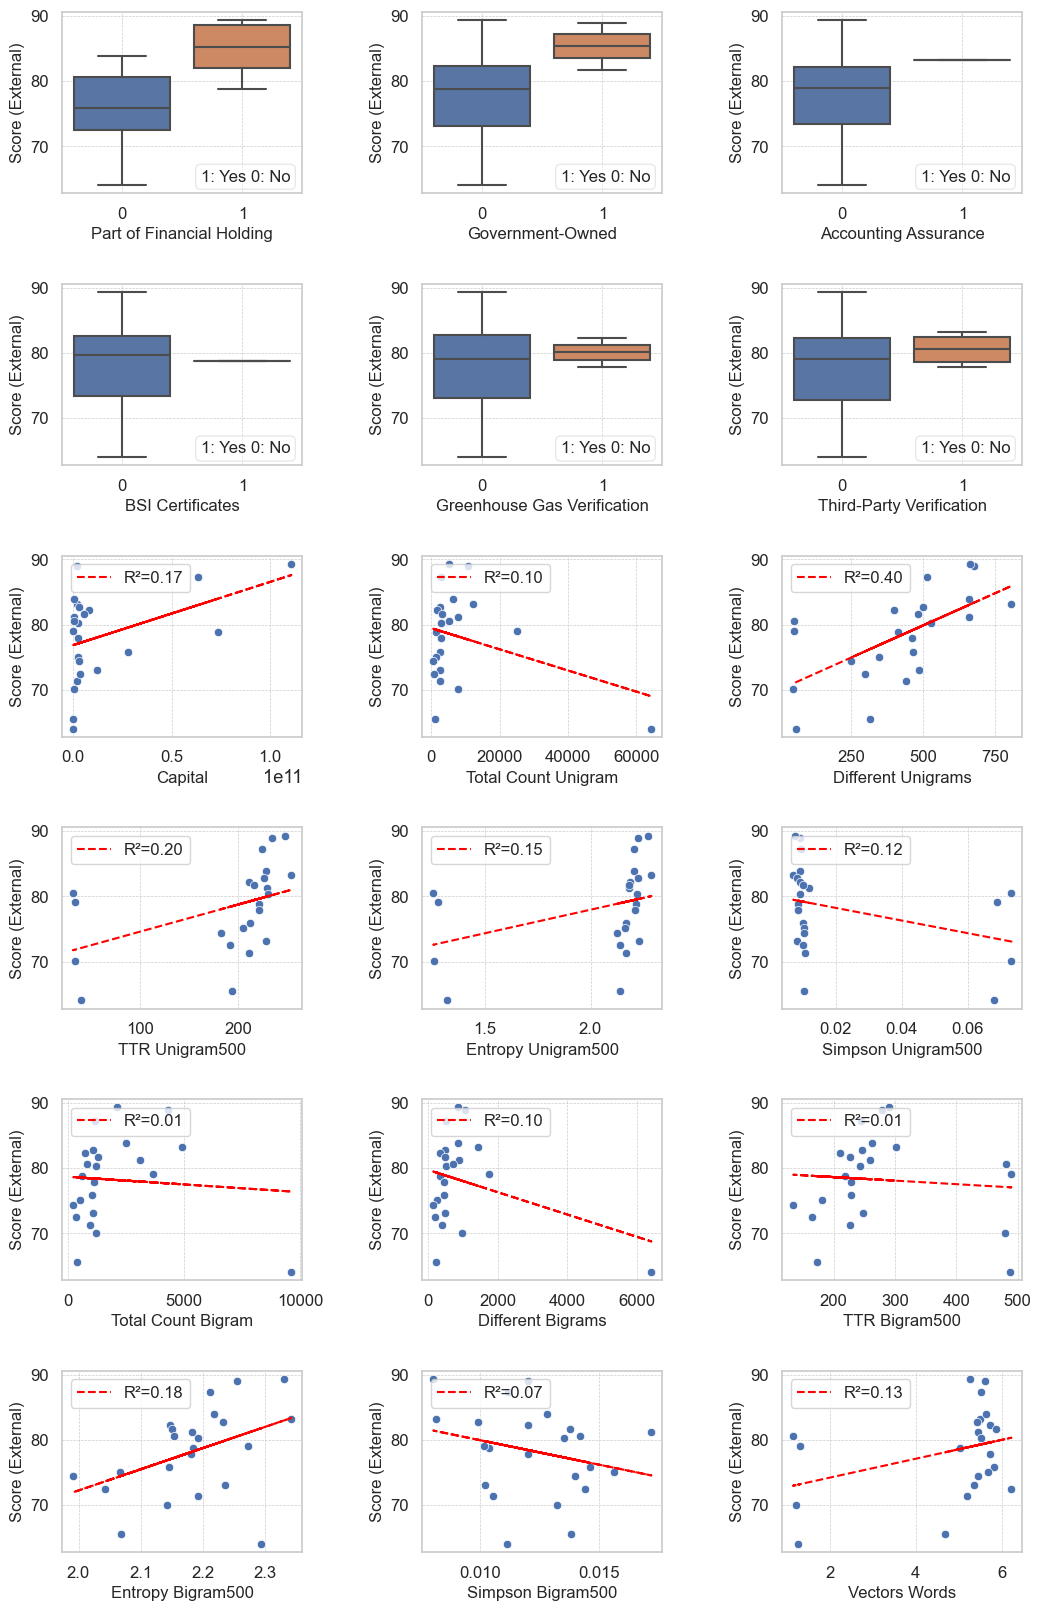

In [107]:
# Set up 6x3 figure layout
fig, axs = plt.subplots(6, 3, figsize=(12, 20))

# Set general style
sns.set(style="whitegrid", font_scale=1.2)  # Scale font size

# X-label mapping for replacements
label_mapping = {
    'financial_holding_parent_company': 'Part of Financial Holding',
    'government-owned_parent_company': 'Government-Owned',
    'TTR_Unigram500': 'TTR Unigram500',
    'TTR_Bigram500': 'TTR Bigram500',
    'BSI-issued_certificates': 'BSI Certificates',
}

# Boxplot data and axes
boxplot_axs = [
    ('financial_holding_parent_company', axs[0, 0], '1: Yes 0: No'),
    ('government-owned_parent_company', axs[0, 1], '1: Yes 0: No'),
    ('accounting_assurance', axs[0, 2], '1: Yes 0: No'),
    ('BSI-issued_certificates', axs[1, 0], '1: Yes 0: No'),
    ('greenhouse_gas_verification', axs[1, 1], '1: Yes 0: No'),
    ('third-party_verification', axs[1, 2], '1: Yes 0: No')
]

# Plot boxplots
for x_col, ax, legend_text in boxplot_axs:
    sns.boxplot(x=x_col, y='Score_external', data=plotdf, ax=ax)
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (External)', fontsize=12)
    # Add text annotation instead of legend
    ax.text(0.95, 0.05, 
            legend_text,
            transform=ax.transAxes,  # Use subplot coordinate system
            fontsize=12, 
            va='bottom', 
            ha='right',
            bbox=dict(
                facecolor='white',  # Background color
                alpha=0.5,  # Semi-transparent
                edgecolor='lightgray',  # Light gray border
                boxstyle='round')
            )

# Scatterplot data and axes
scatter_axs = [
    ('capital', axs[2, 0]),
    ('Total_Count_Unigram', axs[2, 1]),
    ('Different_Unigrams', axs[2, 2]),
    ('TTR_Unigram500', axs[3, 0]),
    ('Entropy_Unigram500', axs[3, 1]),
    ('Simpson_Unigram500', axs[3, 2]),
    ('Total_Count_Bigram', axs[4, 0]),
    ('Different_Bigrams', axs[4, 1]),
    ('TTR_Bigram500', axs[4, 2]),
    ('Entropy_Bigram500', axs[5, 0]),
    ('Simpson_Bigram500', axs[5, 1]),
    ('vectors_Words', axs[5, 2]),
]

# Define function to add trendlines
def add_trendline(ax, x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.plot(x, intercept + slope * x, color='red', linestyle='--', label=f'R²={r_value**2:.2f}')
    ax.legend(loc='upper left', fontsize=12)  # Display R² value

# Plot scatterplots with trendlines
for x_col, ax in scatter_axs:
    sns.scatterplot(x=x_col, y='Score_external', data=plotdf, ax=ax)
    add_trendline(ax, plotdf[x_col], plotdf['Score_external'])
    label = label_mapping.get(x_col, x_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Score (External)', fontsize=12)

# Add grid and adjust tick params for all subplots
for ax in axs.flat:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9)  # Adjust subplot layout

# Save figure
#plt.savefig('tier1_compliant_figure_6x3_life_external.png', dpi=1000, bbox_inches='tight')
plt.savefig('tier1_compliant_figure_6x3_property_external.png', dpi=1000, bbox_inches='tight')
# Display figure
plt.show()

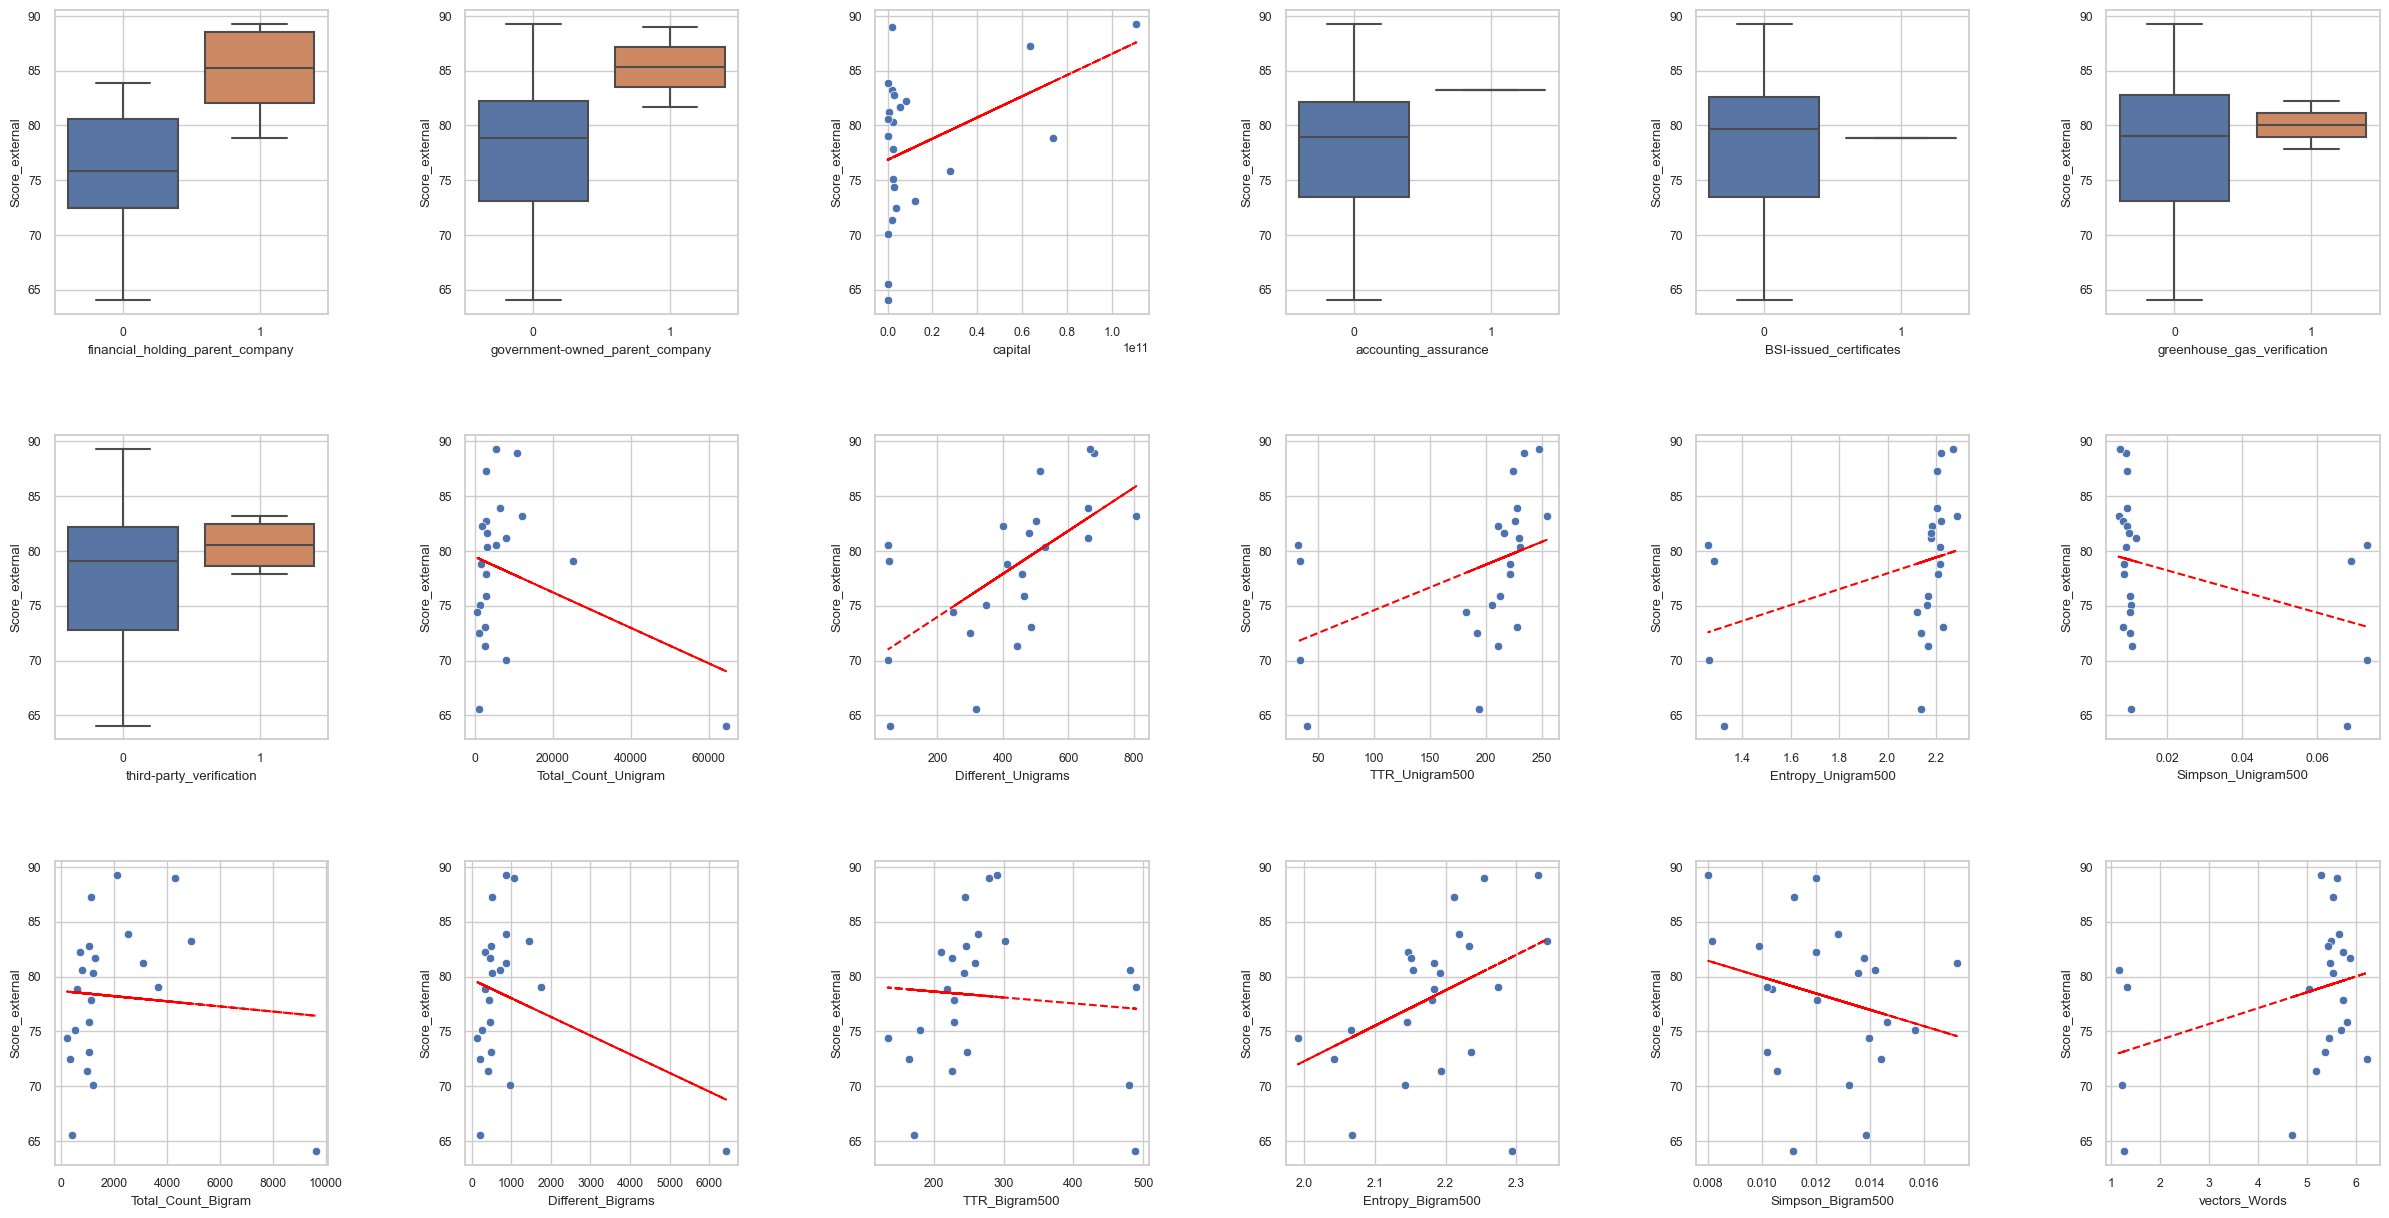

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 加载数据
df_ins_engvariable = pd.read_excel('./data/insuranceContent/ins_tcfdesg_feature_engvariable.xlsx')
df_life = df_ins_engvariable[df_ins_engvariable['Life_Ins']==1]
df_property = df_ins_engvariable[df_ins_engvariable['Property_Ins']==1]

#plotdf = df_life
plotdf = df_property

# 设置图表布局
fig, axs = plt.subplots(3, 6, figsize=(30, 15))

# 设置通用样式
sns.set(style="whitegrid", font_scale=0.8)

# 定义添加趋势线的函数
def add_trendline(ax, x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.plot(x, intercept + slope * x, color='red', linestyle='--')

# 绘制箱线图和散点图
sns.boxplot(x='financial_holding_parent_company', y='Score_external', data=plotdf, ax=axs[0, 0])
sns.boxplot(x='government-owned_parent_company', y='Score_external', data=plotdf, ax=axs[0, 1])
sns.boxplot(x='accounting_assurance', y='Score_external', data=plotdf, ax=axs[0, 3])
sns.boxplot(x='BSI-issued_certificates', y='Score_external', data=plotdf, ax=axs[0, 4])
sns.boxplot(x='greenhouse_gas_verification', y='Score_external', data=plotdf, ax=axs[0, 5])
sns.boxplot(x='third-party_verification', y='Score_external', data=plotdf, ax=axs[1, 0])

# 绘制带有趋势线的散点图
scatter_axs = [
    ('capital', 'Score_external', axs[0, 2]),
    ('Total_Count_Unigram', 'Score_external', axs[1, 1]),
    ('Different_Unigrams', 'Score_external', axs[1, 2]),
    ('TTR_Unigram500', 'Score_external', axs[1, 3]),
    ('Entropy_Unigram500', 'Score_external', axs[1, 4]),
    ('Simpson_Unigram500', 'Score_external', axs[1, 5]),
    ('Total_Count_Bigram', 'Score_external', axs[2, 0]),
    ('Different_Bigrams', 'Score_external', axs[2, 1]),
    ('TTR_Bigram500', 'Score_external', axs[2, 2]),
    ('Entropy_Bigram500', 'Score_external', axs[2, 3]),
    ('Simpson_Bigram500', 'Score_external', axs[2, 4]),
    ('vectors_Words', 'Score_external', axs[2, 5]),
]

for x_col, y_col, ax in scatter_axs:
    sns.scatterplot(x=x_col, y=y_col, data=plotdf, ax=ax)
    add_trendline(ax, plotdf[x_col], plotdf[y_col])

# 为所有子图添加网格
for ax in axs.flat:
    ax.grid(True)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.5, hspace=0.4)

# 显示图形
plt.show()

# X vs Y_categorical (high vs low)
## Bank

In [60]:
# 加载数据
file_path = './data/bankContent/bank_tcfdesg_feature_engvariable.xlsx'
df = pd.read_excel(file_path)

# 计算中位数
internal_median = df['Score_internal'].median()
external_median = df['Score_external'].median()

# 增加两个新列：基于中位数分组
df['Score_internal_median'] = (df['Score_internal'] >= internal_median).astype(int)
df['Score_external_median'] = (df['Score_external'] >= external_median).astype(int)

# 查看结果
print(df[['Filename', 'Score_internal', 'Score_internal_median', 'Score_external', 'Score_external_median']])
#df.to_excel('./data/bankContent/bank_tcfdesg_feature_engvariable.xlsx', index=False)

                                             Filename  Score_internal  \
0      2022_b_Mega International Commercial Bank_tcfd       77.118930   
1                             2022_b_Hwatai Bank_tcfd       51.420042   
2                               2022_b_Next Bank_tcfd       17.493195   
3                                  2022_b_Huanan_tcfd       59.875630   
4                               2022_b_Line Bank_tcfd       11.401169   
5                                2022_b_KGI Bank_tcfd       59.454864   
6                                    2022_b_HSBC_tcfd       39.316023   
7                              2022_b_Sunny Bank_tcfd       43.133572   
8                        2022_b_Taishin Holdings_tcfd       57.536993   
9                      2022_b_standard chartered_tcfd       37.202872   
10                        2022_b_SiniPac Holding_tcfd       79.327352   
11                         2022_b_TaipeiStarBank_tcfd       18.006162   
12                                    2022_b_SKB_tc

## Insurance

In [108]:
import pandas as pd

file_path = './data/insuranceContent/ins_tcfdesg_feature_engvariable.xlsx'
df_ins = pd.read_excel(file_path)
df_l = df_ins[df_ins['Life_Ins']==1]
#df_p = df_ins[df_ins['Property_Ins']==1]


# 计算中位数
l_internal_median = df_l['Score_internal'].median()
l_external_median = df_l['Score_external'].median()

# 增加两个新列：基于中位数分组
df_l['Score_internal_median'] = (df_l['Score_internal'] >= l_internal_median).astype(int)
df_l['Score_external_median'] = (df_l['Score_external'] >= l_external_median).astype(int)

df_l
# 查看结果
print(df_l[['Filename','Score_internal', 'Score_internal_median', 'Score_external', 'Score_external_median']])

                        Filename  Score_internal  Score_internal_median  \
0          2022_l_chinalife_tcfd       49.686599                      1   
1            2022_l_allianz_tcfd       42.131748                      1   
2          2022_l_twfhclife_tcfd       60.907873                      1   
3            2022_l_pcalife_tcfd       40.825938                      1   
4             2022_l_chubbp_tcfd       18.873457                      0   
5             2022_l_hontai_tcfd       45.592150                      1   
6       2022_l_CTBC Holding_tcfd       40.226942                      0   
7   2022_l_Taishin Holdings_tcfd       36.584891                      0   
8     2022_l_Firstfinancial_tcfd       35.951499                      0   
9            2022_l_shinkong_esg       43.314120                      1   
10            2022_l_BNPtcb_tcfd       45.575323                      1   
11               2022_l_BNP_tcfd       37.978011                      0   
12               2022_l_A

C:\Users\USER\AppData\Local\Temp\ipykernel_20640\431720064.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['Score_internal_median'] = (df_l['Score_internal'] >= l_internal_median).astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_20640\431720064.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['Score_external_median'] = (df_l['Score_external'] >= l_external_median).astype(int)


In [109]:
import pandas as pd

file_path = './data/insuranceContent/ins_tcfdesg_feature_engvariable.xlsx'
df_ins = pd.read_excel(file_path)
df_p = df_ins[df_ins['Property_Ins']==1]

# 计算中位数
p_internal_median = df_p['Score_internal'].median()
p_external_median = df_p['Score_external'].median()

# 增加两个新列：基于中位数分组
df_p['Score_internal_median'] = (df_p['Score_internal'] >= p_internal_median).astype(int)
df_p['Score_external_median'] = (df_p['Score_external'] >= p_external_median).astype(int)

df_p
## 查看结果
print(df_p[['Filename', 'Score_internal', 'Score_internal_median', 'Score_external', 'Score_external_median']])

                    Filename  Score_internal  Score_internal_median  \
21   2022_p_south-china_tcfd       57.461256                      1   
22         2022_p_hotai_tcfd       25.959700                      0   
23         2022_p_fubon_tcfd       40.067344                      1   
24  2022_p_CTBC Holding_tcfd       39.164784                      1   
25           2022_p_BNP_tcfd       26.280731                      0   
26           2022_p_MSIG_esg       24.699043                      0   
27           2022_p_AIG_tcfd       28.412388                      1   
28         2022_p_tfmic_tcfd       12.916417                      0   
29         2022_p_chubb_tcfd       14.093361                      0   
30         2022_p_taian_tcfd       45.466892                      1   
31         2022_p_tokio_tcfd       27.199157                      1   
32     2022_p_taiwanfire_esg       21.823645                      0   
33       2022_p_shinkong_esg       22.720090                      0   
34    

C:\Users\USER\AppData\Local\Temp\ipykernel_20640\2779713893.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['Score_internal_median'] = (df_p['Score_internal'] >= p_internal_median).astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_20640\2779713893.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['Score_external_median'] = (df_p['Score_external'] >= p_external_median).astype(int)


## Internal

In [110]:
#df = df_l
df = df_p
df

,Filename,Year,Life_Ins,Property_Ins,Company_Name,Company_Name_CN_brief,Company_Name_CN,Score_external,tcfd,esg,...,accounting_assurance,BSI-issued_certificates,greenhouse_gas_verification,third-party_verification,Score_internal,Rank,vectors_Words,vectors_Wordstop500,Score_internal_median,Score_external_median
21,2022_p_south-china_tcfd,2022,0,1,south-china,華南產險,華南產物保險股份有限公司,88.964286,1,0,...,0,0,0,0,57.461256,3,5.615370,2.155071,1,1
22,2022_p_hotai_tcfd,2022,0,1,hotai,和泰產險,和泰產物保險股份有限公司,75.857143,1,0,...,0,0,0,0,25.959700,33,5.815554,2.178701,0,0
23,2022_p_fubon_tcfd,2022,0,1,fubon,富邦產險,富邦產物保險股份有限公司,89.291667,1,0,...,0,0,0,0,40.067344,21,5.276626,2.172286,1,1
24,2022_p_CTBC Holding_tcfd,2022,0,1,CTBC Holding,中國信託產險,中國信託產物保險股份有限公司,83.208333,1,0,...,1,0,0,1,39.164784,19,5.487936,2.171859,1,1
25,2022_p_BNP_tcfd,2022,0,1,BNP,巴黎產險,法商法國巴黎產物保險股份有限公司台灣分公司,83.892857,1,0,...,0,0,0,0,26.280731,32,5.643857,2.166092,0,1
26,2022_p_MSIG_esg,2022,0,1,MSIG,明台產險,明台產物保險股份有限公司,75.107143,0,1,...,0,0,0,0,24.699043,34,5.687697,2.187706,0,0
27,2022_p_AIG_tcfd,2022,0,1,AIG,美國國際產險,新加坡商美國國際產物保險股份有限公司台灣分公司,81.214286,1,0,...,0,0,0,0,28.412388,29,5.463338,2.185301,1,1
28,2022_p_tfmic_tcfd,2022,0,1,tfmic,漁保社,有限責任台灣區漁船產物保險合作社,65.571429,1,0,...,0,0,0,0,12.916417,42,4.687719,2.175232,0,0
29,2022_p_chubb_tcfd,2022,0,1,chubb,安達物產,美商安達產物保險股份有限公司台灣分公司,71.357143,1,0,...,0,0,0,0,14.093361,40,5.188644,2.187475,0,0
30,2022_p_taian_tcfd,2022,0,1,taian,泰安產險,泰安產物保險股份有限公司,82.750000,1,0,...,0,0,0,0,45.466892,12,5.439302,2.187604,1,1


In [112]:
import numpy as np
import pandas as pd

# property insurance log transformation
df_log = df.copy()

for col in ['capital', 'vectors_Words',
            'Total_Count_Unigram', 'Different_Unigrams', 'TTR_Unigram500', 'Entropy_Unigram500', 'Simpson_Unigram500',
            'Total_Count_Bigram', 'Different_Bigrams', 'TTR_Bigram500', 'Entropy_Bigram500', 'Simpson_Bigram500']:
    df_log[col] = np.log10(1+df_log[col])

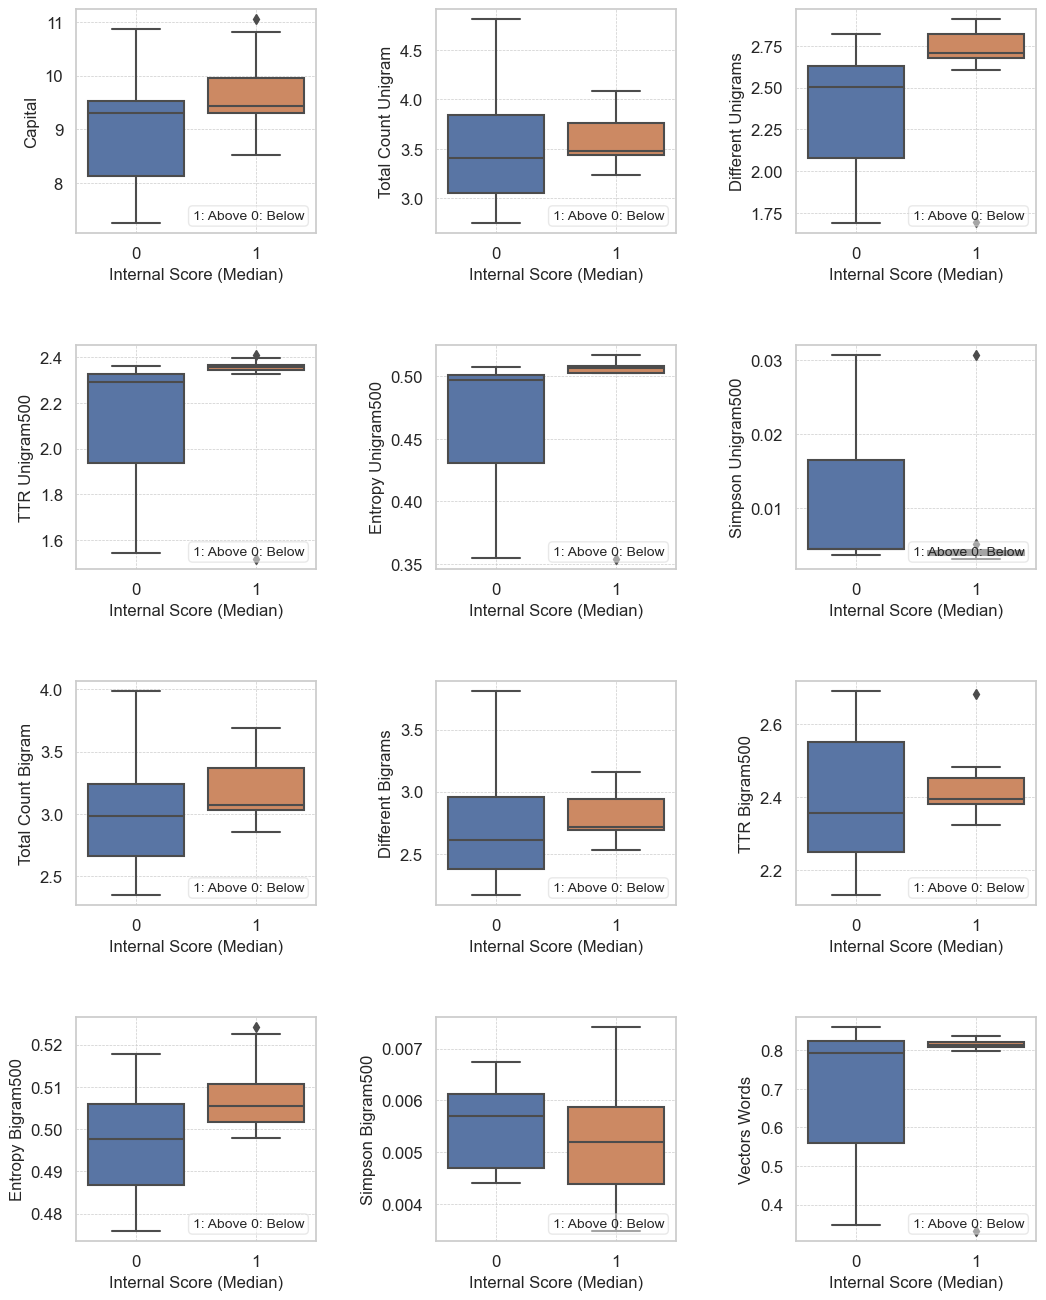

In [114]:
fig, axs = plt.subplots(4, 3, figsize=(12, 16))

# Set general style
sns.set(style="whitegrid", font_scale=1.2)  # Scale font size

# X-label mapping for replacements
label_mapping = {
    'TTR_Unigram500': 'TTR Unigram500',
    'TTR_Bigram500': 'TTR Bigram500',
}

# Boxplot data and axes
boxplot_axs = [
    ('capital', axs[0, 0], '1: Above 0: Below'),
    ('Total_Count_Unigram', axs[0, 1], '1: Above 0: Below'),
    ('Different_Unigrams', axs[0, 2], '1: Above 0: Below'),
    ('TTR_Unigram500', axs[1, 0], '1: Above 0: Below'),
    ('Entropy_Unigram500', axs[1, 1], '1: Above 0: Below'),
    ('Simpson_Unigram500', axs[1, 2], '1: Above 0: Below'),
    ('Total_Count_Bigram', axs[2, 0], '1: Above 0: Below'),
    ('Different_Bigrams', axs[2, 1], '1: Above 0: Below'),
    ('TTR_Bigram500', axs[2, 2], '1: Above 0: Below'),
    ('Entropy_Bigram500', axs[3, 0], '1: Above 0: Below'),
    ('Simpson_Bigram500', axs[3, 1], '1: Above 0: Below'),
    ('vectors_Words', axs[3, 2], '1: Above 0: Below'),
]

# Plot boxplots
for y_col, ax, legend_text in boxplot_axs:
    sns.boxplot(x='Score_internal_median', y=y_col, data=df_log, ax=ax) #df_log
    label = label_mapping.get(y_col, y_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel('Internal Score (Median)', fontsize=12)
    ax.set_ylabel(label, fontsize=12)
    # Add text annotation instead of legend
    ax.text(0.95, 0.05, 
            legend_text,
            transform=ax.transAxes,  # Use subplot coordinate system
            fontsize=10, 
            va='bottom', 
            ha='right',
            bbox=dict(
                facecolor='white',  # Background color
                alpha=0.5,  # Semi-transparent
                edgecolor='lightgray',  # Light gray border
                boxstyle='round')
            )

# Add grid and adjust tick params for all subplots
for ax in axs.flat:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9)  # Adjust subplot layout

# Save figure
#plt.savefig('tier1_compliant_figure_6x3_bank_internal_median.png', dpi=1000, bbox_inches='tight')
#plt.savefig('tier1_compliant_figure_6x3_life_internal_median.png', dpi=1000, bbox_inches='tight')
#plt.savefig('tier1_compliant_figure_6x3_property_internal_median.png', dpi=1000, bbox_inches='tight')
plt.savefig('tier1_compliant_figure_6x3_property_internal_median_log.png', dpi=1000, bbox_inches='tight')
# Display figure
plt.show()

## External

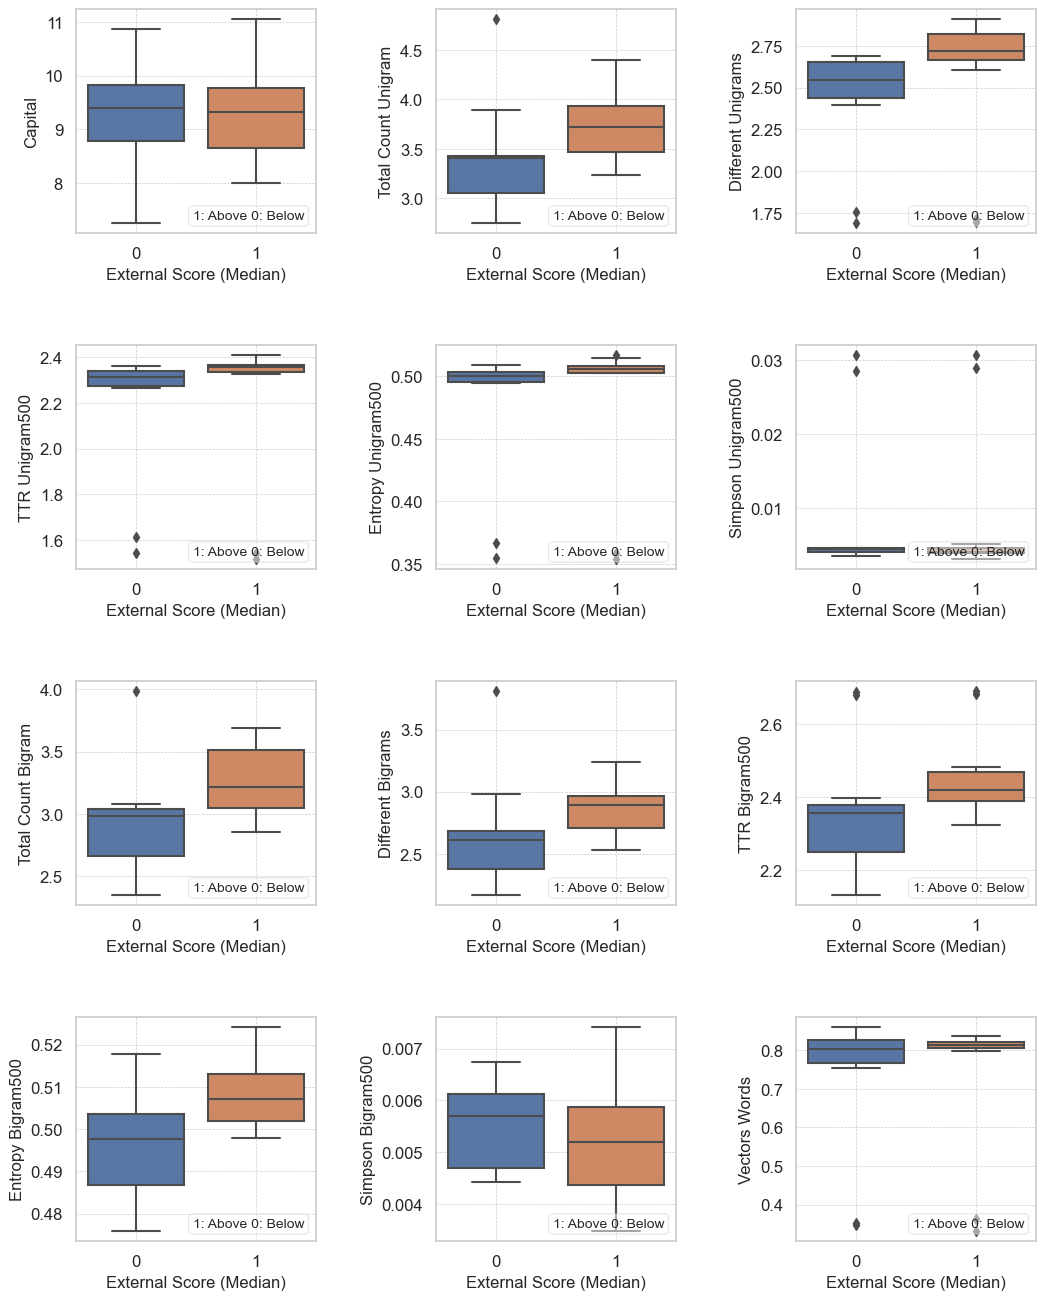

In [116]:
# Set up 6x3 figure layout
fig, axs = plt.subplots(4, 3, figsize=(12, 16))

# Set general style
sns.set(style="whitegrid", font_scale=1.2)  # Scale font size

# X-label mapping for replacements
label_mapping = {
    'TTR_Unigram500': 'TTR Unigram500',
    'TTR_Bigram500': 'TTR Bigram500',
}

# Boxplot data and axes
boxplot_axs = [
    ('capital', axs[0, 0], '1: Above 0: Below'),
    ('Total_Count_Unigram', axs[0, 1], '1: Above 0: Below'),
    ('Different_Unigrams', axs[0, 2], '1: Above 0: Below'),
    ('TTR_Unigram500', axs[1, 0], '1: Above 0: Below'),
    ('Entropy_Unigram500', axs[1, 1], '1: Above 0: Below'),
    ('Simpson_Unigram500', axs[1, 2], '1: Above 0: Below'),
    ('Total_Count_Bigram', axs[2, 0], '1: Above 0: Below'),
    ('Different_Bigrams', axs[2, 1], '1: Above 0: Below'),
    ('TTR_Bigram500', axs[2, 2], '1: Above 0: Below'),
    ('Entropy_Bigram500', axs[3, 0], '1: Above 0: Below'),
    ('Simpson_Bigram500', axs[3, 1], '1: Above 0: Below'),
    ('vectors_Words', axs[3, 2], '1: Above 0: Below'),
]

# Plot boxplots
for y_col, ax, legend_text in boxplot_axs:
    sns.boxplot(x='Score_external_median', y=y_col, data=df_log, ax=ax) #df_log
    label = label_mapping.get(y_col, y_col.replace('_', ' ').title())  # Replace specific labels
    ax.set_xlabel('External Score (Median)', fontsize=12)
    ax.set_ylabel(label, fontsize=12)
    # Add text annotation instead of legend
    ax.text(0.95, 0.05, 
            legend_text,
            transform=ax.transAxes,  # Use subplot coordinate system
            fontsize=10, 
            va='bottom', 
            ha='right',
            bbox=dict(
                facecolor='white',  # Background color
                alpha=0.5,  # Semi-transparent
                edgecolor='lightgray',  # Light gray border
                boxstyle='round')
            )

# Add grid and adjust tick params for all subplots
for ax in axs.flat:
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9)  # Adjust subplot layout

# Save figure
#plt.savefig('tier1_compliant_figure_6x3_bank_external_median.png', dpi=1000, bbox_inches='tight')
#plt.savefig('tier1_compliant_figure_6x3_life_external_median.png', dpi=1000, bbox_inches='tight')
#plt.savefig('tier1_compliant_figure_6x3_property_external_median.png', dpi=1000, bbox_inches='tight')
plt.savefig('tier1_compliant_figure_6x3_property_external_median_log.png', dpi=1000, bbox_inches='tight')
# Display figure
plt.show()